In [1]:
import numpy as np
import os
import pickle

task_list = [ 'autoencoder','class_1000', 'class_places','curvature', 'edge2d', 'edge3d',\
                         'keypoint2d', 'keypoint3d','reshade', 'rgb2depth', 'rgb2mist', 'rgb2sfnorm','room_layout' , \
                         'segment25d', 'segment2d', 'segmentsemantic','vanishing_point']
list_of_tasks = 'autoencoder curvature denoise edge2d edge3d \
keypoint2d keypoint3d colorization \
reshade rgb2depth rgb2mist rgb2sfnorm \
room_layout segment25d segment2d vanishing_point \
segmentsemantic class_1000 class_places inpainting_whole pascal_voc_segmentation'
task_list_new = list_of_tasks.split(' ')
indices = []
for task in task_list:
    indices.append(task_list_new.index(task))


indices = np.array(indices)
print(indices)

[ 0 17 18  1  3  4  5  6  8  9 10 11 12 13 14 16 15]


In [2]:
import matplotlib
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-60, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [3]:
path = '/home/kshitid20/Documents/Gemma Roig lab Dropbox/Kshitij/Multitask/CVPR_transferlearning/CVPR2020_results/pascal_normcomparison_timing_pascal_5000'
os.chdir(path)

In [4]:
from scipy.stats import spearmanr,pearsonr
model_numbers = np.arange(10, 500, 10)
corr_value_iters =[]
for model_number in model_numbers:
    kernel_affinities =  np.load(str(model_number).zfill(3) +'_kernels.npy',allow_pickle=True).item()
    rdm_affinities = np.load(str(model_number).zfill(3) +'_rdms.npy',allow_pickle=True).item()

    corr_value = {}
    performance = [0.590164306133055,0.649290395668602,0.652942936208706,0.647184483742267,0.600769184861427,\
                               0.649696268320798, 0.5994201374950169,0.647529319500711,\
                               0.6300454561362,0.6487250234464327,0.643817731132111,0.647786678981121,0.625850319733945,\
                               0.656534260134841,0.629964850307006,0.648764305659868, 0.589181267604318];

    for kernel,kernel_affinity in kernel_affinities.items():
        corr_value[kernel] = {}
        for similarity,similarity_affinity in kernel_affinity.items():
            corr_value[kernel][similarity] = {}
            for ablation,ablation_affinity in similarity_affinity.items():
                corr_value[kernel][similarity][ablation] = {}
                for f_ablation,f_ablation_affinity in ablation_affinity.items():
                    corr_value_matrix = np.zeros(f_ablation_affinity.shape[0])
                    for iter in range(f_ablation_affinity.shape[0]):
                        #print(f_ablation_affinity.shape)
                        #print(f_ablation_affinity[iter,:])
                        #print(performance)
                        temp,_ = spearmanr(performance, f_ablation_affinity[iter,indices])
                        corr_value_matrix[iter] = temp
                    corr_value[kernel][similarity][ablation][f_ablation] = corr_value_matrix
                    print(kernel,similarity,ablation,f_ablation)


    for rdm,rdm_affinity in rdm_affinities.items():
        corr_value[rdm] = {}
        for similarity,similarity_affinity in rdm_affinity.items():
            corr_value[rdm][similarity] = {}
            for ablation,ablation_affinity in similarity_affinity.items():
                corr_value[rdm][similarity][ablation] = {}
                for f_ablation,f_ablation_affinity in ablation_affinity.items():
                    corr_value_matrix = np.zeros(f_ablation_affinity.shape[0])
                    for iter in range(f_ablation_affinity.shape[0]):
                        print(f_ablation_affinity.shape,f_ablation_affinity[iter,indices])
                        temp,_ = spearmanr(performance, f_ablation_affinity[iter,indices])
                        corr_value_matrix[iter] = temp
                    corr_value[rdm][similarity][ablation][f_ablation] = corr_value_matrix
                    print(rdm,similarity,ablation,f_ablation)
    corr_value_iters.append(corr_value)

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [ 0.53359402  0.40557488  0.38510923  0.19345912 -0.26819637  0.10394479
  0.57701135  0.24286629  0.53789911  0.14750493  0.419063    0.42006898
  0.24410476  0.39035666  0.38255324  0.28969506  0.12615941]
(100, 21) [0.37043739 0.76179174 0.56066263 0.47109985 0.19188835 0.62134464
 0.29506701 0.54287411 0.60444907 0.47040792 0.66994858 0.30617369
 0.44472673 0.75269438 0.28535904 0.32167518 0.63849715]
(100, 21) [0.06424668 0.40051053 0.55148632 0.19528924 0.2576197  0.24957507
 0.11105978 0.37972352 0.37003172 0.52031718 0.48954751 0.38139414
 0.43517822 0.45217561 0.30432594 0.36039618 0.01816689]
(100, 21) [ 0.30126187  0.43449234  0.2205346   0.12746487  0.08843407  0.36039865
  0.12361525  0.32965323  0.2162827   0.08822694  0.08468947 -0.01960984
  0.3080254   0.51297233  0.27072771  0.10016028 -0.23441876]
(100, 21) [-0.20719723  0.44946539  0.37226564  0.32888263  0.0

(100, 21) [0.23640597 0.54431592 0.53699728 0.26212685 0.00615659 0.43537958
 0.1969245  0.21575886 0.49520139 0.34723457 0.40298325 0.44114566
 0.66346523 0.23926286 0.1323348  0.2476929  0.34104934]
(100, 21) [-0.31078224 -0.12514933  0.10033562 -0.16984734 -0.28914552 -0.13826434
 -0.32498357 -0.16361053  0.34393051  0.31349842  0.04222218  0.04512287
 -0.20509122 -0.21060554 -0.34660713 -0.37001702  0.20468525]
(100, 21) [-0.11362508  0.21335645  0.35671585  0.01959528 -0.15811539 -0.14924837
 -0.08874353  0.0460995   0.17013771  0.10905989 -0.00753048  0.03329169
  0.48129213  0.06781543  0.0086576   0.10719127  0.31817872]
(100, 21) [ 0.60252175  0.39027508  0.14777902  0.24242736  0.23668553  0.05340944
  0.52140707  0.30324671  0.04946448 -0.07481841  0.16507674  0.25772953
  0.16297302  0.18586258  0.44836422  0.06441715 -0.17650301]
pearson cka debiased_centered znorm
(100, 21) [ 0.41466014  0.32127851  0.34595195  0.26406302 -0.12587866 -0.01830321
  0.42760111  0.19594796  

(100, 21) [ 0.02925096  0.17656279 -0.08378524  0.53859538  0.39137548  0.38167716
 -0.01149708  0.18965365  0.31358113  0.15849435  0.39646052  0.22341707
  0.13561153  0.53318199  0.2344829   0.69845352  0.02592392]
(100, 21) [-0.24047594  0.12458609 -0.03400237  0.07979934 -0.13967854 -0.16287812
 -0.2362071   0.13096473  0.08185349  0.30639952  0.00995893  0.05912233
 -0.12703663 -0.02839153  0.00627965  0.08465518  0.13025492]
(100, 21) [-0.04962895 -0.02419039  0.0500256   0.29426768  0.15940464  0.32885116
  0.01126121  0.10058413  0.09864212 -0.06952402  0.10297517  0.03639891
  0.22658877  0.28587051  0.01759609 -0.00134531  0.10448191]
(100, 21) [ 0.01597396  0.25857084  0.33200941  0.47082181  0.23632339  0.1898277
 -0.02465857  0.38936991  0.23126298  0.04721553  0.28985167  0.24004694
  0.29786696  0.50804879  0.0826353   0.25781011  0.04514756]
(100, 21) [ 0.06609851  0.38379186  0.11605417  0.08894429 -0.13078618  0.34897893
  0.12186893  0.17618645  0.4069129   0.470906

(100, 21) [0.23280044 0.29398387 0.26312451 0.39234714 0.14775403 0.19668263
 0.13772123 0.26112058 0.2813099  0.25187726 0.25774721 0.2223796
 0.18420084 0.26940533 0.09882462 0.12426272 0.06165061]
(100, 21) [0.02249716 0.3373566  0.25263919 0.46077908 0.25724674 0.35931257
 0.02261135 0.32973771 0.35866992 0.35006612 0.35356593 0.25664468
 0.28645876 0.42707646 0.12369593 0.23527543 0.07935009]
(100, 21) [ 0.21137814  0.18253948  0.31216386  0.24829997  0.1852536   0.14532499
  0.13692692  0.17638418  0.18050563  0.10182872  0.18192116  0.13537029
  0.03011241  0.16518667  0.18049995  0.21373304 -0.05423688]
(100, 21) [0.0869022  0.35971136 0.25521193 0.14444177 0.15100968 0.22577879
 0.16743184 0.12997304 0.24235996 0.25467125 0.150838   0.16277155
 0.08404102 0.07534133 0.06435443 0.21127943 0.0764819 ]
(100, 21) [ 0.03184025  0.44661643  0.3481549   0.25131385  0.15103693  0.23836598
 -0.04848057  0.36234035  0.22417296  0.22238704  0.22546733  0.27405132
  0.22271585  0.1625609 

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.14078917 0.37561488 0.3418181  0.21262406 0.04535826 0.1363571
 0.12002847 0.206008   0.27265243 0.27493648 0.28627462 0.14219269
 0.21163654 0.38739713 0.20998725 0.20329035 0.08975776]
(100, 21) [0.21399369 0.42961893 0.33988936 0.39102014 0.07482646 0.28949681
 0.10025933 0.29269647 0.28306265 0.25864217 0.34451732 0.26053272
 0.24992782 0.4234921  0.19459619 0.24000138 0.14435193]
(100, 21) [0.17310687 0.27595037 0.32203262 0.33635295 0.14460925 0.27781454
 0.12798699 0.30231739 0.37911032 0.30335334 0.31339774 0.21538889
 0.19565796 0.46038    0.26051511 0.32002326 0.07261487]
(100, 21) [0.24199164 0.28901799 0.22645041 0.1786637  0.10471163 0.19173691
 0.20746661 0.23521916 0.26403241 0.2171046  0.21139805 0.13747368
 0.17420202 0.24484796 0.22275183 0.07943219 0.01803368]
(100, 21) [0.08864436 0.27496977 0.2344639  0.27467147 0.14928392 0.22595117
 0.1027533  0.3092427

(100, 21) [ 0.04887001  0.28187157  0.22786709  0.22708681  0.1084152   0.2851048
  0.00500335  0.27235119  0.25994347  0.23794508  0.28371678  0.09537725
  0.07596502  0.25368261  0.09841031  0.16074277 -0.01119071]
(100, 21) [0.21805359 0.27064009 0.28282785 0.39636642 0.15898062 0.31118552
 0.24212764 0.42398342 0.34302759 0.27719796 0.39421805 0.37771144
 0.24739477 0.32662327 0.33488477 0.25183743 0.0628774 ]
(100, 21) [0.1421979  0.28282372 0.23890703 0.25299034 0.14180274 0.17643747
 0.12123293 0.17843265 0.21012918 0.19580909 0.24143346 0.08718711
 0.1609728  0.20943063 0.13806401 0.20568664 0.08204216]
(100, 21) [0.20457408 0.35694977 0.33137329 0.29728341 0.12991435 0.13214527
 0.19618675 0.21149115 0.25304171 0.33955041 0.24292521 0.17550367
 0.14831781 0.25770347 0.21932885 0.21705986 0.01248548]
(100, 21) [ 0.02573434  0.38173944  0.29976536  0.15616627  0.15946542  0.17954013
 -0.00052163  0.19560952  0.25490603  0.35235937  0.30638845  0.20578218
  0.10674515  0.24788629

(100, 21) [0.10376052 0.35499118 0.22605427 0.19246772 0.13462195 0.22525006
 0.08535784 0.28503172 0.21842891 0.30121427 0.27153404 0.24535944
 0.21722779 0.34228132 0.16315429 0.25290919 0.13522426]
(100, 21) [ 0.16919086  0.17971018  0.17528045  0.22398745  0.06975076  0.1170692
  0.18115756  0.19799465  0.13571716  0.09392423  0.12735612  0.10940818
 -0.01661701  0.1493457   0.16032595  0.23652694  0.00920203]
(100, 21) [3.96208323e-02 4.44339114e-01 3.06922939e-01 3.12221519e-01
 1.23002225e-01 4.14616514e-01 2.40536083e-04 4.25734082e-01
 4.39055727e-01 3.53193057e-01 4.08759649e-01 3.25919171e-01
 1.29760176e-01 3.90344187e-01 1.01332675e-01 1.87469976e-01
 1.15901567e-01]
(100, 21) [0.10408332 0.32349917 0.25234296 0.3106744  0.16049039 0.29034417
 0.16242653 0.32505676 0.267798   0.19737702 0.28712238 0.2692435
 0.17969279 0.27284599 0.20780009 0.26115303 0.11725478]
(100, 21) [0.09250142 0.24502706 0.27229168 0.20447138 0.079191   0.12651135
 0.06208689 0.23616754 0.17082572 

rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.16914139 0.40884102 0.31968215 0.26085164 0.10593294 0.18842902
 0.16526134 0.22407741 0.26152626 0.27076051 0.30162711 0.18185838
 0.22724837 0.35893195 0.23345593 0.21741954 0.13002801]
(100, 21) [0.20344633 0.4131366  0.36180271 0.36732275 0.09300404 0.28509887
 0.07217348 0.28783668 0.29508121 0.26211956 0.33327858 0.28186507
 0.21486843 0.39586261 0.147802   0.24569399 0.08073435]
(100, 21) [0.17457968 0.29564628 0.3164207  0.32606592 0.11231309 0.23565697
 0.14539801 0.26484297 0.33443393 0.2977415  0.3269295  0.1920258
 0.14786966 0.42073215 0.2374533  0.26053078 0.08027726]
(100, 21) [0.21865579 0.29168777 0.25764154 0.23618851 0.1248341  0.17572493
 0.18346462 0.22814638 0.27382126 0.17564713 0.22454316 0.13985764
 0.15278562 0.34834226 0.23670733 0.09353158 0.04510572]
(100, 21) [0.05891672 0.22370152 0.21875627 0.23601917 0.14316858 0.19734626
 0.0678491  0.25625557 0.22236634 0.20920349 0.30612896 

(100, 21) [0.08427777 0.24337726 0.30675887 0.30469504 0.0703197  0.27016466
 0.10782732 0.28885962 0.22726739 0.2497364  0.25367019 0.2767141
 0.12660046 0.28941318 0.15164263 0.22947706 0.07531581]
(100, 21) [0.13896118 0.3553572  0.30187761 0.20494019 0.07898095 0.22256399
 0.04784489 0.15355859 0.25237122 0.23207709 0.22498973 0.14622461
 0.11963855 0.20447424 0.07944227 0.17761164 0.03745677]
(100, 21) [0.1597165  0.31598705 0.28933054 0.25714655 0.07327329 0.22238612
 0.10642782 0.16288545 0.16456549 0.18001956 0.25953132 0.15656764
 0.14656831 0.22713312 0.19513939 0.21019203 0.11101574]
(100, 21) [0.08672717 0.30583567 0.32435164 0.26682295 0.10894056 0.22024318
 0.06954511 0.2581625  0.24778111 0.26817018 0.24947028 0.21662029
 0.12144629 0.35647091 0.15239503 0.24580876 0.07919509]
(100, 21) [0.22877514 0.31185362 0.24070354 0.31580327 0.10799331 0.33386847
 0.15621109 0.29683657 0.33628063 0.26166775 0.34250413 0.23922393
 0.21691115 0.35968104 0.23094889 0.26041438 0.136998

(100, 21) [0.24152084 0.33223364 0.2566784  0.28643839 0.20305173 0.21110514
 0.14077296 0.27929647 0.23200992 0.2009123  0.21821483 0.1480867
 0.14475471 0.25734802 0.20144691 0.28169795 0.10201824]
(100, 21) [0.17357088 0.31677174 0.27454153 0.33453815 0.04189406 0.25103529
 0.14138825 0.25929608 0.2485567  0.258032   0.33109499 0.23033341
 0.16080159 0.33561892 0.18337172 0.21481696 0.21181818]
(100, 21) [0.05763945 0.26153271 0.27871377 0.10619701 0.06299002 0.19003885
 0.02824251 0.22895823 0.242808   0.20291049 0.3480343  0.19996633
 0.13539401 0.18971114 0.07072401 0.13783017 0.03899714]
(100, 21) [0.19707042 0.36887689 0.37405221 0.36683409 0.11869946 0.32776899
 0.19433718 0.28003452 0.2592071  0.21840491 0.30881036 0.23964976
 0.1897033  0.43167872 0.1832678  0.20967776 0.1079284 ]
(100, 21) [0.00346526 0.25869886 0.21842103 0.18089608 0.05252092 0.10999787
 0.00526353 0.14260113 0.17575986 0.17091462 0.1841268  0.16723056
 0.13852104 0.20290709 0.13619278 0.16095733 0.041886

(100, 21) [0.08918202 0.16946155 0.16938995 0.28488654 0.10004057 0.2806417
 0.05785615 0.26881681 0.24737439 0.14937067 0.23900036 0.24000311
 0.11176219 0.23093107 0.12061522 0.26144596 0.04433958]
(100, 21) [0.07164871 0.20117498 0.23910618 0.16155518 0.06864419 0.18466579
 0.06146313 0.13476997 0.17417074 0.22143306 0.25455845 0.15688446
 0.15223693 0.23100353 0.13115742 0.1409644  0.07923945]
(100, 21) [0.19376148 0.35241461 0.3293944  0.29051811 0.17525238 0.25913999
 0.16800202 0.27686202 0.29011628 0.29411839 0.32850426 0.31744986
 0.20489821 0.25780238 0.24581156 0.18457316 0.06034678]
(100, 21) [0.13790168 0.30705629 0.32914491 0.3171969  0.1027746  0.27939273
 0.07245112 0.25754415 0.28749466 0.18786362 0.23009689 0.20971529
 0.21204722 0.32925565 0.14900174 0.28984336 0.20548389]
(100, 21) [0.09352611 0.26230707 0.23863167 0.30743416 0.06011771 0.31520875
 0.05816684 0.2945609  0.27827991 0.24759299 0.27505007 0.20145674
 0.2516173  0.37247076 0.1505391  0.27101781 0.131650

rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.12715573 0.34255466 0.28219255 0.25688278 0.10032103 0.20182922
 0.11494958 0.25117438 0.26779338 0.26951237 0.30093992 0.1992944
 0.19451843 0.36768119 0.20254625 0.19635629 0.10404695]
(100, 21) [0.18425287 0.43264308 0.40849128 0.37796344 0.09992984 0.28941303
 0.07611092 0.28013691 0.35493438 0.31478811 0.3893147  0.2917267
 0.20612261 0.41882831 0.13592267 0.29807495 0.11573677]
(100, 21) [0.13100802 0.27075307 0.26660785 0.29873859 0.11553864 0.1897779
 0.11784157 0.2332942  0.29330228 0.24636791 0.33626776 0.23111923
 0.17490553 0.35288573 0.19555755 0.19897814 0.09740948]
(100, 21) [0.18678924 0.31009108 0.25894655 0.22124072 0.11171569 0.18056863
 0.18322332 0.22984165 0.24312831 0.20614289 0.26245862 0.15471722
 0.19240351 0.31115754 0.20332054 0.13745542 0.03254388]
(100, 21) [0.07789957 0.27460118 0.2422713  0.21459033 0.12253523 0.18818474
 0.08590723 0.23037843 0.20738701 0.19478801 0.25955645 0.

(100, 21) [0.10192801 0.24984163 0.24443926 0.20469241 0.08601328 0.1891104
 0.07964375 0.1655145  0.14142275 0.10788743 0.17600486 0.15122119
 0.11596779 0.20571821 0.11406837 0.17782008 0.17285196]
(100, 21) [0.14711783 0.27409432 0.35318286 0.30919094 0.10704152 0.22996668
 0.13664108 0.26896341 0.27402108 0.23939186 0.31329768 0.19204928
 0.14470302 0.36028269 0.17662399 0.23403187 0.11726971]
(100, 21) [0.16650923 0.30462831 0.2864435  0.42584676 0.19105948 0.30784665
 0.11918725 0.27749323 0.33390806 0.28904405 0.3062186  0.28025101
 0.21221176 0.4195084  0.29282796 0.19562067 0.1903443 ]
(100, 21) [0.14439208 0.30944515 0.37772274 0.40356286 0.16663454 0.32759534
 0.10125118 0.34760919 0.32741845 0.26420728 0.38471836 0.23276766
 0.19481729 0.35621799 0.18046689 0.24276201 0.11327279]
(100, 21) [0.20912925 0.33986078 0.29073604 0.40533961 0.16974996 0.28711233
 0.15444925 0.26385264 0.26790617 0.26780775 0.2900287  0.23614631
 0.13815008 0.35482719 0.22282288 0.22044042 0.078512

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.12386202 0.33544324 0.26958254 0.22788036 0.08537763 0.17490727
 0.11769161 0.23057793 0.22564265 0.21897324 0.27341657 0.17695828
 0.17121314 0.33051085 0.16976394 0.18523454 0.07654986]
(100, 21) [0.14322832 0.41427404 0.3950274  0.37418028 0.08418267 0.30761564
 0.06848265 0.29767138 0.37485115 0.30746458 0.37044283 0.28390191
 0.19148658 0.40252087 0.12618182 0.28992513 0.08794242]
(100, 21) [0.13079422 0.31150688 0.30169359 0.30467818 0.12159206 0.22511843
 0.11100286 0.26544723 0.31404233 0.27402112 0.362046   0.24447767
 0.17923396 0.33173351 0.19859329 0.19365729 0.09754337]
(100, 21) [0.17644075 0.31474065 0.27322483 0.24195375 0.11654239 0.18000475
 0.17762103 0.26449728 0.25387941 0.20090773 0.26504803 0.15720441
 0.17738504 0.31728521 0.20183697 0.13146956 0.03614451]
(100, 21) [0.0868829  0.27959775 0.23642849 0.2237324  0.11062783 0.1788057
 0.10347364 0.2348236

(100, 21) [0.14021567 0.28406593 0.28682353 0.28515124 0.08285034 0.2485921
 0.1144379  0.2553868  0.29404595 0.18196846 0.28608102 0.22352838
 0.17226691 0.28916766 0.1664184  0.23163288 0.08294231]
(100, 21) [0.21062241 0.33942875 0.31670546 0.29470659 0.16202713 0.28473206
 0.14690876 0.31666235 0.36815843 0.25285053 0.31774481 0.28975516
 0.19435997 0.34657101 0.22390156 0.21542585 0.04143254]
(100, 21) [0.17024406 0.32551093 0.33589512 0.287272   0.13357773 0.20718622
 0.16330751 0.31066025 0.31680107 0.3099857  0.40355694 0.25880602
 0.21425764 0.29931406 0.21790833 0.27556232 0.10239959]
(100, 21) [0.19221599 0.33880845 0.29944373 0.34316979 0.07646032 0.2208915
 0.19262017 0.27280667 0.30081496 0.22891266 0.30485304 0.26417438
 0.14695404 0.33910348 0.19644705 0.20132255 0.14337869]
(100, 21) [0.13447081 0.35702175 0.29378285 0.24217779 0.15938321 0.24219173
 0.12501036 0.27367043 0.29976701 0.25823707 0.31964146 0.20900978
 0.18998195 0.28063554 0.16059594 0.21933704 0.0857696

(100, 21) [0.1687912  0.3786661  0.2989189  0.36080139 0.09501057 0.30043004
 0.1088995  0.28689924 0.32552975 0.21725991 0.29687773 0.25978675
 0.15214793 0.36762304 0.17846197 0.2749455  0.059558  ]
(100, 21) [0.12074807 0.3019213  0.2533694  0.35898758 0.1264711  0.27386083
 0.09697195 0.28864101 0.22957095 0.18438253 0.27784166 0.22978447
 0.17249431 0.29883449 0.16498419 0.22010061 0.06814517]
(100, 21) [0.08584345 0.32508359 0.28187951 0.20422328 0.0975945  0.18749171
 0.08047648 0.2145957  0.25156338 0.12725408 0.21496824 0.20785964
 0.14216734 0.23830274 0.12538037 0.20987709 0.07194003]
(100, 21) [0.12505488 0.29227164 0.27594595 0.18232366 0.05239256 0.2298915
 0.08141952 0.21086779 0.23610901 0.24234723 0.28697278 0.16345994
 0.11893608 0.22468093 0.1278453  0.21872058 0.05139009]
(100, 21) [0.17107433 0.2772497  0.23830609 0.28349092 0.11852022 0.31200185
 0.16463812 0.26633412 0.22927103 0.20586901 0.27834121 0.26149678
 0.18503827 0.3357202  0.20242034 0.18963329 0.072951

lap cka debiased_centered znorm
(100, 21) [0.15388738 0.33449591 0.28460025 0.21004095 0.08346006 0.16666208
 0.12953204 0.23820465 0.2227372  0.2271789  0.27422036 0.17549178
 0.18091516 0.32437058 0.17144244 0.18163606 0.05905894]
(100, 21) [0.15206253 0.39907114 0.38146409 0.37922481 0.09824905 0.29092597
 0.07967986 0.28945688 0.37932508 0.3095072  0.36793449 0.27917257
 0.20075186 0.40498192 0.14687975 0.28851467 0.10732647]
(100, 21) [0.12485713 0.29069642 0.28262737 0.29690215 0.13169979 0.22342425
 0.10980255 0.25965293 0.2985606  0.27098896 0.34455071 0.24033306
 0.18397065 0.31313044 0.19020278 0.19071632 0.09137839]
(100, 21) [0.18221842 0.32954017 0.26830934 0.25516417 0.12115114 0.20629633
 0.16160338 0.27290419 0.25265193 0.21042124 0.25366505 0.16692965
 0.1786731  0.32097863 0.1986824  0.14335637 0.05439028]
(100, 21) [0.10658343 0.28903848 0.26124307 0.23139965 0.12190047 0.20722869
 0.10138835 0.25306894 0.23922313 0.22841621 0.27313114 0.17904651
 0.1624805  0.239400

 0.1261079  0.33448189 0.18360465 0.26565313 0.13277987]
(100, 21) [0.09609753 0.3536898  0.27593054 0.28653029 0.09366463 0.2209376
 0.0787056  0.24669837 0.23648599 0.2202032  0.25473453 0.24643414
 0.21704708 0.27067006 0.1481415  0.16339405 0.11703824]
(100, 21) [0.13642927 0.27856542 0.28438996 0.28845455 0.06888792 0.22690508
 0.11521666 0.23448269 0.2304614  0.211832   0.29097805 0.17643317
 0.15739852 0.19395626 0.13664239 0.18606909 0.08641721]
(100, 21) [0.13375968 0.28432184 0.25461255 0.19170515 0.11583856 0.19367296
 0.11778506 0.19528872 0.23153709 0.23743706 0.24309574 0.17548735
 0.14654581 0.17710973 0.13730674 0.24035911 0.07562165]
(100, 21) [0.13759017 0.24007171 0.245986   0.25590147 0.08177261 0.2048906
 0.12722397 0.20759329 0.21802792 0.21050777 0.26379214 0.17160119
 0.14695435 0.23180256 0.18808594 0.20830095 0.1203509 ]
(100, 21) [0.13562134 0.28471523 0.27570326 0.32672981 0.09205168 0.22766432
 0.07230581 0.21707025 0.27604084 0.28033012 0.27772687 0.212883

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.17599611 0.32766273 0.2766062  0.2206185  0.07445799 0.17417801
 0.13704585 0.23264187 0.23030208 0.2167433  0.26010073 0.18749456
 0.16899376 0.30758159 0.17656015 0.1890179  0.07228277]
(100, 21) [0.13572636 0.38188291 0.35618051 0.35886612 0.09992865 0.27029467
 0.07646656 0.28844781 0.3517062  0.28439918 0.33574654 0.26341369
 0.17630763 0.38109822 0.1497867  0.26993909 0.09462955]
(100, 21) [0.12607883 0.29157801 0.27484398 0.28874244 0.12254113 0.21661506
 0.1053234  0.25127793 0.29863666 0.28086942 0.34466285 0.22056654
 0.17378329 0.31494602 0.16850304 0.20070262 0.07988213]
(100, 21) [0.1847284  0.32962416 0.27083792 0.24601033 0.11512946 0.20294787
 0.15732776 0.26871205 0.24713369 0.22017864 0.25212758 0.16876926
 0.18269091 0.30568899 0.19073573 0.15485411 0.05102855]
(100, 21) [0.11297573 0.30735739 0.27231186 0.24370783 0.12468124 0.21546528
 0.0617373  0.249070

(100, 21) [0.20808869 0.3455386  0.33455878 0.29291576 0.14971249 0.27298096
 0.15067299 0.30404706 0.32680103 0.22611758 0.3159506  0.28341217
 0.21315609 0.33981558 0.22671174 0.21654011 0.04086471]
(100, 21) [0.1643173  0.34942527 0.33967475 0.2727084  0.10979869 0.21740199
 0.15777017 0.28845367 0.28692749 0.27477252 0.35614963 0.24793919
 0.19993275 0.29986723 0.19168213 0.25889288 0.09692938]
(100, 21) [0.18674662 0.34793203 0.30363668 0.3311788  0.09314116 0.23726405
 0.18470954 0.26304565 0.3057713  0.22169295 0.31025753 0.25512695
 0.14293514 0.33898047 0.21115739 0.19553773 0.13398682]
(100, 21) [0.10694931 0.3210069  0.25692793 0.22609905 0.11343607 0.21700788
 0.10008123 0.23556135 0.25908846 0.23522462 0.27899971 0.18431347
 0.17110684 0.21875635 0.12774103 0.17043211 0.06518359]
(100, 21) [0.15667372 0.33192244 0.26622508 0.24407975 0.09206434 0.2046937
 0.08701526 0.22849589 0.29405125 0.24073722 0.27785692 0.18323793
 0.19487732 0.28582242 0.14844026 0.22864789 0.084264

(100, 21) [0.06963923 0.28254641 0.23943658 0.27949806 0.1138669  0.15673876
 0.04836565 0.28253349 0.25804797 0.18775346 0.22565336 0.22468631
 0.14599899 0.25627521 0.14755821 0.24910347 0.07972576]
(100, 21) [0.15119289 0.31873738 0.31863922 0.25847635 0.09635052 0.28338683
 0.13452301 0.26958548 0.32615962 0.28548126 0.35783    0.21519423
 0.22228719 0.28728495 0.16054429 0.21804241 0.04208975]
(100, 21) [0.16028238 0.31164508 0.29887394 0.26731697 0.09847951 0.25301524
 0.1333499  0.28753961 0.26189335 0.2080573  0.2646524  0.2123536
 0.14617563 0.28356851 0.17425644 0.25703948 0.11120054]
(100, 21) [0.17401931 0.24207506 0.27168683 0.22643772 0.08845787 0.16638556
 0.1481106  0.21838489 0.19668659 0.16122746 0.18105762 0.17349276
 0.12870022 0.19680065 0.18117104 0.18463221 0.03661183]
(100, 21) [0.14016927 0.30786989 0.2492678  0.24526616 0.07982663 0.15866471
 0.0822878  0.21065261 0.23616253 0.16842763 0.25990508 0.20486947
 0.147524   0.22863608 0.12339718 0.2102822  0.078073

lap cka debiased_centered znorm
(100, 21) [0.16525906 0.32580367 0.280407   0.235832   0.07922413 0.16717604
 0.12846992 0.22443574 0.22516805 0.2139862  0.26766609 0.17602293
 0.15245281 0.30230719 0.16775318 0.18212294 0.09691449]
(100, 21) [0.16384515 0.37966253 0.35506423 0.36855865 0.11647366 0.27419291
 0.09659376 0.28810492 0.34483696 0.27411214 0.34322316 0.25750965
 0.17535469 0.39739113 0.16540324 0.2725526  0.10960931]
(100, 21) [0.14406537 0.31440941 0.28240467 0.30819227 0.12589889 0.22503071
 0.12736897 0.26190787 0.30040328 0.27529627 0.35604601 0.24903849
 0.16748757 0.32564009 0.1795998  0.21861768 0.06446534]
(100, 21) [0.16425654 0.31931823 0.26326201 0.25340805 0.10954457 0.2121713
 0.14303742 0.28406358 0.25177267 0.21914378 0.2628588  0.18126037
 0.20340892 0.30245918 0.17452604 0.16368028 0.06398239]
(100, 21) [0.11907415 0.30588995 0.2694734  0.24542402 0.13030171 0.21486052
 0.08273677 0.25306602 0.25076526 0.21713493 0.25833479 0.17891177
 0.15354864 0.2564944

(100, 21) [0.15528902 0.30937679 0.27556565 0.29418132 0.09987146 0.22357859
 0.08852434 0.24427363 0.25399867 0.22171278 0.28297391 0.18213877
 0.15910151 0.30721176 0.15277492 0.24107039 0.11276496]
(100, 21) [0.15414944 0.30923645 0.28430957 0.29947505 0.07224534 0.22173603
 0.11522573 0.24324773 0.24194853 0.2399578  0.28328616 0.2186785
 0.15054052 0.2965648  0.16142134 0.22506269 0.11726831]
(100, 21) [0.10450896 0.34258879 0.32070202 0.28728077 0.07885269 0.24371677
 0.06734834 0.30021009 0.31154186 0.27353326 0.35504755 0.25333882
 0.13514344 0.2507616  0.11946037 0.19991374 0.08086694]
(100, 21) [0.19969089 0.35508456 0.30417854 0.36803714 0.11244888 0.27225818
 0.14867891 0.29209158 0.272837   0.19918565 0.3036811  0.22843729
 0.17665629 0.3588682  0.17815787 0.23041769 0.08704504]
(100, 21) [0.05635724 0.27023002 0.23083051 0.22879352 0.08248118 0.1818554
 0.04360014 0.2340472  0.23160625 0.22002372 0.26732595 0.18023898
 0.14818992 0.252515   0.1093833  0.1809476  0.0848957

rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.173225   0.33041239 0.27188867 0.24863712 0.08787176 0.17497421
 0.125188   0.22429395 0.22695917 0.21348884 0.26666965 0.17990783
 0.16068042 0.30787692 0.17630289 0.19366533 0.08618984]
(100, 21) [0.16170662 0.38862163 0.35055428 0.38564411 0.12852507 0.29328349
 0.08659592 0.29930349 0.36066893 0.2855817  0.35949003 0.28176077
 0.18241267 0.40322262 0.15924818 0.28861034 0.11257754]
(100, 21) [0.15775361 0.32067832 0.28575863 0.29868109 0.13697253 0.23320951
 0.13203274 0.26812754 0.30151168 0.27303122 0.34250078 0.24265437
 0.183558   0.3149643  0.18918219 0.20262752 0.08104717]
(100, 21) [0.17213626 0.3163961  0.27299651 0.2527283  0.1209022  0.22016894
 0.14393938 0.2785892  0.25720107 0.21444217 0.26788773 0.18782156
 0.19870754 0.31602237 0.17774977 0.17495566 0.07024265]
(100, 21) [0.11458402 0.29065227 0.27079216 0.25449929 0.13194077 0.21236397
 0.08619609 0.25055623 0.25002228 0.2136569  0.25843294

(100, 21) [0.13408304 0.30302835 0.32486763 0.3222394  0.08811302 0.26322339
 0.11453817 0.24897468 0.28260647 0.26461236 0.30728501 0.2610284
 0.15719995 0.32743633 0.17115371 0.24802128 0.06981173]
(100, 21) [0.13978852 0.31016108 0.2911215  0.21268233 0.07885917 0.22462245
 0.09760932 0.2131878  0.23784806 0.19809868 0.23734231 0.19838879
 0.12854771 0.23328038 0.1325219  0.19979974 0.06276175]
(100, 21) [0.0970193  0.27599485 0.27531491 0.26986555 0.07206032 0.23475082
 0.07391936 0.2302218  0.23049599 0.20113036 0.24003329 0.18024287
 0.15214236 0.23925856 0.11032562 0.21802361 0.10378788]
(100, 21) [0.09277367 0.27016087 0.27319281 0.2617992  0.08676102 0.19662397
 0.06428179 0.21512694 0.24561638 0.23702418 0.25526568 0.18900553
 0.17359272 0.26238247 0.12805098 0.22007884 0.06356255]
(100, 21) [0.12410547 0.27396595 0.23430242 0.29317747 0.0874614  0.25046854
 0.09199687 0.2776259  0.26336683 0.19323829 0.26668336 0.20101371
 0.174474   0.26067415 0.1507743  0.23576237 0.106263

(100, 21) [0.12175498 0.31520756 0.27964352 0.20205585 0.09437317 0.26507372
 0.09791795 0.2539076  0.26515552 0.18475572 0.28883123 0.22692074
 0.15157082 0.31381533 0.17006192 0.19559089 0.07032734]
(100, 21) [0.12705932 0.28263364 0.29035622 0.28287089 0.10424669 0.25465698
 0.11167102 0.24298084 0.29991243 0.23394264 0.28638438 0.18007703
 0.14448915 0.30094146 0.15702984 0.24593009 0.0420083 ]
(100, 21) [0.13931836 0.2684625  0.26491094 0.22311292 0.07247647 0.18976126
 0.12338124 0.18841655 0.23374936 0.21300297 0.2169279  0.14995857
 0.12263768 0.20129549 0.13952646 0.18521413 0.02006529]
(100, 21) [0.08086115 0.28709119 0.23596404 0.2596538  0.09434546 0.26201088
 0.05497229 0.27707476 0.2847839  0.19049127 0.26705613 0.23673661
 0.14413088 0.28038173 0.11094352 0.20659004 0.11844619]
(100, 21) [0.13567158 0.25304502 0.26504568 0.2331473  0.08916972 0.18194157
 0.10273813 0.2065265  0.23526027 0.20026093 0.22656352 0.19217063
 0.16841981 0.23036901 0.15955249 0.14623408 0.07514

(100, 21) [0.16171064 0.28132996 0.2677986  0.25780811 0.08015784 0.22117259
 0.11639907 0.24247971 0.2292544  0.18409376 0.22313711 0.15600535
 0.12748128 0.29425761 0.16236971 0.20316362 0.0806059 ]
(100, 21) [0.13168165 0.32885743 0.29167209 0.2431465  0.09630769 0.2949373
 0.10945978 0.27341584 0.28589659 0.21227496 0.3174082  0.22614664
 0.16441814 0.3333262  0.18136867 0.23264593 0.09621667]
(100, 21) [0.11324265 0.28728215 0.2811152  0.31473417 0.0905312  0.264432
 0.09845549 0.25616428 0.29245387 0.24114505 0.29618185 0.1695478
 0.1396121  0.29739553 0.1456716  0.24658147 0.06257467]
(100, 21) [0.153599   0.29890298 0.30487205 0.26160542 0.07156254 0.21042473
 0.13601524 0.21789182 0.26212008 0.23377116 0.23884806 0.16357698
 0.14408357 0.23216193 0.16235915 0.20670794 0.07548458]
(100, 21) [0.08852574 0.30491181 0.2561723  0.30101658 0.08558796 0.27722141
 0.05892609 0.28296103 0.29625748 0.21574282 0.29416921 0.2419892
 0.15849973 0.30606974 0.11526647 0.19789055 0.10811908]


rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.16343671 0.31713162 0.27389842 0.25473083 0.08441674 0.17530869
 0.12357662 0.22989912 0.24459652 0.20457547 0.27990275 0.18968744
 0.15160395 0.3044281  0.16382085 0.19329863 0.08653528]
(100, 21) [0.154276   0.38229671 0.3393459  0.36932089 0.12279805 0.30102805
 0.08967913 0.29637735 0.35540653 0.28674206 0.35621599 0.27005503
 0.1782526  0.41185243 0.16033639 0.2898263  0.11701925]
(100, 21) [0.13547628 0.30130333 0.27493643 0.2810038  0.12999264 0.23479052
 0.10553324 0.26526878 0.288666   0.25437863 0.32058989 0.23791
 0.17045813 0.29370025 0.17098949 0.18919256 0.0878661 ]
(100, 21) [0.16126432 0.30714372 0.27795385 0.27022377 0.12373137 0.22868949
 0.13196014 0.27254405 0.26314705 0.22284785 0.28379596 0.18792875
 0.19359665 0.31805193 0.17510546 0.18782881 0.07142107]
(100, 21) [0.11746115 0.3035022  0.28038816 0.26188817 0.12333396 0.21119696
 0.09021625 0.23461999 0.26415154 0.21951754 0.27899175 0.

(100, 21) [0.08109539 0.2605708  0.27421042 0.23642168 0.059536   0.21803289
 0.06638079 0.21406002 0.22454567 0.1998332  0.23194431 0.16896249
 0.14234465 0.20680114 0.10643031 0.20860162 0.101218  ]
(100, 21) [0.12036919 0.29609438 0.27974604 0.29881458 0.09450294 0.21909174
 0.07479797 0.24300556 0.25858932 0.2535079  0.25964738 0.21346829
 0.17369509 0.30101595 0.14361846 0.24560373 0.06680749]
(100, 21) [0.12266079 0.28412166 0.23983486 0.29405007 0.08453588 0.25436254
 0.08289007 0.28226589 0.26520579 0.18693469 0.27836214 0.20914141
 0.16241521 0.27159799 0.14677032 0.21686649 0.12399199]
(100, 21) [0.12301891 0.28772752 0.24991284 0.23641318 0.09226191 0.22321917
 0.08441503 0.20278749 0.23892849 0.19361627 0.22062884 0.19048018
 0.12422163 0.24044499 0.1272525  0.15824629 0.10427515]
(100, 21) [0.18825713 0.28250968 0.30040004 0.33464944 0.12185219 0.22149505
 0.18577763 0.27845924 0.26149609 0.20593282 0.29090501 0.21938629
 0.13722299 0.32003309 0.22190419 0.22275568 0.07723

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.15883155 0.30439065 0.27298685 0.2502492  0.08536448 0.17285832
 0.11771214 0.22578816 0.23795551 0.19966248 0.26993605 0.19613718
 0.15601647 0.29175931 0.1534813  0.19655605 0.08014644]
(100, 21) [0.15591009 0.37210127 0.33347331 0.3591737  0.12227037 0.29179346
 0.09151466 0.28412976 0.33926536 0.28157992 0.33834229 0.25394898
 0.17531102 0.39892972 0.16172319 0.2855249  0.11736218]
(100, 21) [0.12751272 0.29114712 0.26354895 0.26220885 0.12162165 0.21839369
 0.10202053 0.25874415 0.27541678 0.23881272 0.30731721 0.22625614
 0.16168431 0.27792563 0.1696288  0.16790727 0.07915693]
(100, 21) [0.15683502 0.30892295 0.28589344 0.26726501 0.11823146 0.22496749
 0.12961725 0.26469828 0.26899217 0.22748093 0.2938064  0.18853463
 0.19113643 0.31100882 0.16765882 0.19287786 0.06876363]
(100, 21) [0.11031943 0.31371873 0.28178548 0.26689825 0.1304429  0.22368911
 0.08374331 0.263938

(100, 21) [0.11595162 0.27504361 0.26115914 0.30189972 0.11837804 0.25516963
 0.08178925 0.2761227  0.23641598 0.20664185 0.28405965 0.22651174
 0.16693094 0.30741932 0.18197331 0.23405387 0.06776782]
(100, 21) [0.16347245 0.30760698 0.28533619 0.29300959 0.10712321 0.21641799
 0.09020413 0.22927666 0.25187697 0.23693741 0.28886055 0.15760064
 0.16257501 0.29809448 0.15827396 0.18978245 0.08584126]
(100, 21) [0.16473924 0.33854954 0.30281946 0.26889031 0.09327409 0.20901045
 0.13421758 0.22231024 0.25453212 0.25130656 0.27656361 0.18344029
 0.17456247 0.29893944 0.17420816 0.23462288 0.10968282]
(100, 21) [0.13152868 0.34839733 0.30009678 0.30575364 0.11077238 0.24628784
 0.08292178 0.27936462 0.33180971 0.27399668 0.34271596 0.25898357
 0.15742511 0.29039211 0.13574695 0.18918744 0.07633097]
(100, 21) [0.15572953 0.35004058 0.30918547 0.34425647 0.13447595 0.28556926
 0.12731509 0.30000202 0.30556022 0.21855278 0.29272862 0.24475396
 0.16942545 0.36015434 0.16536553 0.23563908 0.10539

(100, 21) [0.16136324 0.27894932 0.25967664 0.28200077 0.08926651 0.21133097
 0.12807493 0.24818717 0.24173549 0.21599283 0.25243496 0.21048258
 0.15377541 0.25537129 0.15856675 0.17629678 0.08096291]
(100, 21) [0.16879011 0.29245747 0.26794489 0.30317494 0.10407166 0.24826444
 0.15137805 0.27767536 0.27140408 0.1832975  0.28382214 0.21853793
 0.13193577 0.2662671  0.19020859 0.19298085 0.07440106]
(100, 21) [0.14415957 0.29649409 0.26977604 0.25787852 0.11604539 0.23126294
 0.11768597 0.26882746 0.22238494 0.17669881 0.24147456 0.1962417
 0.14157971 0.26499531 0.17234101 0.19380412 0.04500584]
(100, 21) [0.18910551 0.31444651 0.31369468 0.30926893 0.13249152 0.26321938
 0.15301934 0.27741623 0.27033546 0.23759828 0.2867054  0.26578461
 0.14741425 0.27303838 0.20221129 0.23017439 0.07101953]
(100, 21) [0.15459335 0.28144494 0.28776427 0.14490095 0.13204185 0.21831071
 0.10643575 0.26156318 0.25584828 0.18123146 0.22488812 0.1934622
 0.14367888 0.27937362 0.18203047 0.21014155 0.0528841

(100, 21) [0.10645656 0.30285216 0.24619951 0.29626831 0.09509991 0.27301894
 0.07001751 0.28080248 0.28513594 0.20779287 0.29813888 0.23831105
 0.15396741 0.32304822 0.1251637  0.20251216 0.09588345]
(100, 21) [0.12147953 0.28266102 0.27549069 0.26035791 0.07685026 0.2110887
 0.09181685 0.22200879 0.25194308 0.22926274 0.26128798 0.19036881
 0.16347283 0.25389435 0.14780554 0.17072503 0.06404795]
(100, 21) [0.11071368 0.287857   0.26392156 0.25082306 0.08673053 0.24965877
 0.10320229 0.27029996 0.26030664 0.26286598 0.25692688 0.22513333
 0.18342006 0.28919318 0.14931141 0.25714114 0.09115687]
(100, 21) [0.19469635 0.27550476 0.26955135 0.30954834 0.10177096 0.23519251
 0.14680005 0.26344329 0.25871516 0.2374009  0.28897626 0.19924705
 0.17772645 0.26884344 0.20384316 0.17200783 0.09206338]
(100, 21) [0.15819698 0.29680955 0.2499848  0.29959123 0.09815945 0.21331906
 0.13227008 0.24034519 0.21989662 0.19584961 0.25227086 0.19123019
 0.13543168 0.24775357 0.15104034 0.19750483 0.092379

rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.14911096 0.29588446 0.2746192  0.23392008 0.0891592  0.16508941
 0.11286065 0.21287913 0.22671989 0.19695836 0.2495604  0.18435316
 0.15271294 0.27688629 0.14662865 0.20051752 0.07536387]
(100, 21) [0.14990292 0.3649701  0.32024039 0.35558548 0.12357132 0.28112749
 0.08279323 0.27270515 0.3439161  0.27787346 0.33095279 0.26305138
 0.18023295 0.39389146 0.16150013 0.27233573 0.12124975]
(100, 21) [0.12302301 0.28272069 0.26214967 0.26987378 0.13487672 0.19744637
 0.09156611 0.25241791 0.26433339 0.23444165 0.29035921 0.21847508
 0.16945888 0.26266015 0.16875939 0.17312806 0.08165936]
(100, 21) [0.14889853 0.3031046  0.28160482 0.27463524 0.11116791 0.23222423
 0.12111435 0.25170774 0.26772644 0.23031762 0.2968381  0.1951158
 0.18762749 0.30633177 0.16311552 0.20707848 0.06308748]
(100, 21) [0.13029575 0.32018379 0.29275914 0.27607127 0.13765314 0.24079058
 0.09222141 0.28604827 0.29810831 0.22402908 0.30226899 

(100, 21) [0.08428012 0.29153948 0.26464505 0.28826961 0.1186989  0.25232092
 0.08104327 0.27428621 0.28539301 0.2337491  0.2621352  0.22774951
 0.14746582 0.23820658 0.1427516  0.19239732 0.09285785]
(100, 21) [0.1669339  0.3243768  0.28971467 0.33900695 0.0962308  0.23271381
 0.11142608 0.27765947 0.30313492 0.22700151 0.27766163 0.23675351
 0.15807489 0.32811353 0.19964129 0.24211761 0.06111934]
(100, 21) [0.10299103 0.27382373 0.24774527 0.26823071 0.08170362 0.26032465
 0.09784828 0.28663752 0.23833887 0.19672454 0.24101599 0.20178823
 0.16172423 0.26414777 0.14211141 0.21852617 0.05829358]
(100, 21) [0.14832803 0.29975563 0.2818361  0.27522158 0.10587423 0.22699655
 0.14356262 0.25002067 0.28342545 0.2101963  0.27667902 0.22380884
 0.17038516 0.25664462 0.19403877 0.21727753 0.08912215]
(100, 21) [0.07794236 0.28453669 0.26516708 0.23696713 0.06653917 0.22076248
 0.0578642  0.22014702 0.26911279 0.26055808 0.24658311 0.18891124
 0.16360746 0.22119186 0.11448326 0.22996384 0.10573

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.14921753 0.29589077 0.28079695 0.24343071 0.09612326 0.17814402
 0.11092443 0.22295134 0.24315777 0.20366081 0.25809068 0.19361657
 0.15667076 0.2853143  0.14982075 0.2012758  0.0847398 ]
(100, 21) [0.14105244 0.35652748 0.31075494 0.32682107 0.1152185  0.27022223
 0.08025082 0.26114557 0.32679618 0.27034722 0.32263867 0.24663056
 0.17159357 0.37517855 0.15106032 0.25893764 0.11607736]
(100, 21) [0.13172695 0.28750221 0.27060336 0.270853   0.13042387 0.2014086
 0.10025402 0.25408215 0.26750489 0.24470086 0.29344474 0.22004175
 0.1730617  0.2620431  0.17124641 0.17849668 0.0799705 ]
(100, 21) [0.16124927 0.31290866 0.29272721 0.29116125 0.11886621 0.25028071
 0.13498017 0.27119303 0.28786864 0.24378011 0.31776938 0.21689807
 0.18949483 0.3185639  0.18187249 0.21671629 0.06599494]
(100, 21) [0.12677278 0.32294032 0.3030363  0.27310963 0.13298588 0.23709062
 0.09085819 0.2786534

 0.16073806 0.32100646 0.19007515 0.24371014 0.12250681]
(100, 21) [0.12802608 0.33890612 0.28902302 0.28907828 0.11935755 0.26344317
 0.11499831 0.27091729 0.29197888 0.23430185 0.3139091  0.25672728
 0.1767336  0.29613169 0.15392019 0.21455975 0.12436657]
(100, 21) [0.13696278 0.30455783 0.26877163 0.24412077 0.10788003 0.22273723
 0.11346695 0.23140883 0.24875296 0.21904969 0.28924105 0.18093252
 0.15423568 0.22751322 0.14253185 0.16986346 0.077333  ]
(100, 21) [0.12203462 0.31514937 0.28332502 0.22147957 0.08722552 0.20180422
 0.10449893 0.22479638 0.24027349 0.25401583 0.26584155 0.19721657
 0.16123964 0.24016295 0.14215834 0.20604911 0.08279047]
(100, 21) [0.11123549 0.28981581 0.26259219 0.26759394 0.10787083 0.22930183
 0.09500718 0.23827803 0.24761924 0.21409281 0.29052006 0.18240975
 0.13520014 0.26569593 0.16620467 0.22563587 0.08381404]
(100, 21) [0.14426795 0.29867932 0.28308752 0.28756629 0.12511753 0.24452925
 0.07884877 0.2490942  0.27563902 0.26355352 0.28314031 0.2258

(100, 21) [0.17358553 0.30835733 0.31204337 0.2663699  0.1010246  0.2660424
 0.14241392 0.26904101 0.27403312 0.22415591 0.28136346 0.207925
 0.18134016 0.31765484 0.19104741 0.24229846 0.05198931]
(100, 21) [0.14335193 0.2990038  0.27630011 0.24492368 0.09526237 0.24166605
 0.10666619 0.26684985 0.25265853 0.19462074 0.2572275  0.20958654
 0.17391841 0.26686085 0.13851719 0.21434086 0.0688478 ]
(100, 21) [0.13705028 0.26613866 0.26207468 0.20352589 0.08673999 0.17740367
 0.12706749 0.21482988 0.22414795 0.18608965 0.21151941 0.17691942
 0.12998036 0.19338579 0.15502295 0.19046524 0.04656878]
(100, 21) [0.17333089 0.29301597 0.24803614 0.26172473 0.10309135 0.20135151
 0.12877195 0.24110914 0.26407203 0.18259489 0.28309518 0.21842568
 0.16778483 0.28176916 0.17061184 0.21261525 0.04375295]
(100, 21) [0.17332741 0.30244265 0.2885993  0.23745206 0.10628378 0.25120981
 0.14398114 0.26084442 0.25919252 0.21762552 0.26212847 0.26112168
 0.19790045 0.28107672 0.18197215 0.25175916 0.11333073

rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.13399939 0.29075131 0.27610145 0.23841018 0.08805014 0.17378007
 0.10324442 0.22558233 0.24613658 0.2145814  0.26287321 0.18924996
 0.15621453 0.28921533 0.13892249 0.19678537 0.08466826]
(100, 21) [0.14792236 0.35761275 0.31003429 0.32738077 0.12335848 0.26400104
 0.0840377  0.25684992 0.33041835 0.26486302 0.3104523  0.23549278
 0.18231967 0.38281296 0.16478274 0.25733536 0.12132082]
(100, 21) [0.12605952 0.28397327 0.26241352 0.26545924 0.11801469 0.19893308
 0.10113258 0.24908703 0.26970547 0.24373122 0.2945466  0.21560286
 0.17152255 0.26029656 0.15886796 0.18734245 0.07810649]
(100, 21) [0.15107833 0.31124881 0.28781232 0.28650776 0.11745688 0.25111615
 0.12728405 0.26703886 0.28656438 0.24490368 0.32029866 0.21842747
 0.19409719 0.31754937 0.17400747 0.22301853 0.06545301]
(100, 21) [0.1304381  0.31910456 0.29463042 0.2735996  0.12490972 0.23548813
 0.09895262 0.28028696 0.28964832 0.21842165 0.29459202

(100, 21) [0.15767144 0.26416358 0.271762   0.28201247 0.10015785 0.26903935
 0.12023464 0.24402951 0.24527757 0.20802817 0.22946567 0.21533222
 0.166685   0.29477525 0.1856069  0.21831128 0.06492461]
(100, 21) [0.15785116 0.30149264 0.29175841 0.29730906 0.08176261 0.25175117
 0.11116009 0.26479072 0.24645558 0.22312661 0.25125338 0.2085127
 0.14257393 0.27863842 0.17024988 0.19953878 0.07698064]
(100, 21) [0.15571021 0.32220929 0.33807146 0.34186101 0.08831342 0.23947577
 0.14869541 0.27186098 0.27533947 0.2431421  0.30164344 0.22258859
 0.17561253 0.34945324 0.19691705 0.2638292  0.07270903]
(100, 21) [0.15034358 0.3083733  0.29329125 0.26064408 0.08421962 0.21058606
 0.12385317 0.23173898 0.22450315 0.2035187  0.26701001 0.18825464
 0.15244622 0.27709828 0.17487208 0.1674831  0.07366484]
(100, 21) [0.12674661 0.31009459 0.28508569 0.31577353 0.06179361 0.21779079
 0.0903501  0.23524979 0.25171475 0.21961286 0.265078   0.20638207
 0.15067148 0.26924326 0.14936197 0.21180527 0.105549

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.13176931 0.29077139 0.27821366 0.24662721 0.09035591 0.18391465
 0.10442508 0.22919435 0.25571137 0.22108437 0.27023177 0.19362819
 0.16547759 0.28982953 0.14083937 0.20291023 0.0845654 ]
(100, 21) [0.15119495 0.36333846 0.3141865  0.32124612 0.12537706 0.26297239
 0.08365888 0.26114778 0.32798797 0.26444341 0.31179526 0.22719337
 0.17699681 0.37899348 0.16869508 0.25738057 0.1184176 ]
(100, 21) [0.12774115 0.2811709  0.26290567 0.25378858 0.11583583 0.19321827
 0.09946556 0.24388862 0.26305344 0.23547083 0.28161476 0.2102571
 0.16748875 0.2540898  0.1599578  0.17651102 0.07897975]
(100, 21) [0.15401944 0.30875136 0.28325791 0.28274794 0.11885211 0.24840743
 0.13087712 0.26237411 0.28266668 0.24065659 0.31260109 0.21218263
 0.18575384 0.30819946 0.1770831  0.21945513 0.06197248]
(100, 21) [0.1303793  0.31434737 0.29424762 0.27331948 0.12446708 0.2341096
 0.09885615 0.27920485

(100, 21) [0.12385831 0.33165678 0.29770077 0.28559343 0.11183225 0.25687272
 0.11215737 0.26226228 0.28541785 0.23958316 0.30918419 0.24727421
 0.17079896 0.29053565 0.15044383 0.21922623 0.10923862]
(100, 21) [0.15326995 0.31310281 0.27015817 0.25542547 0.11356709 0.23033465
 0.13136803 0.2402289  0.25892617 0.22409568 0.29095379 0.19379048
 0.15926192 0.23618238 0.15689737 0.1804924  0.08634822]
(100, 21) [0.1250783  0.31820962 0.28688006 0.23382306 0.08926946 0.20670561
 0.10578453 0.23210152 0.25196977 0.26999788 0.27183071 0.20222512
 0.1669122  0.2435612  0.14376653 0.20829169 0.0777162 ]
(100, 21) [0.10528786 0.287463   0.25350516 0.25688874 0.0926237  0.22950779
 0.08544915 0.22579575 0.24474473 0.21134698 0.2795762  0.17362594
 0.13633572 0.25492285 0.14971694 0.22039687 0.0876196 ]
(100, 21) [0.13629645 0.30034393 0.27782135 0.29719832 0.13333349 0.25004735
 0.08032733 0.26361156 0.27781785 0.26181763 0.2886379  0.23294531
 0.17502053 0.28439096 0.17710145 0.1973644  0.13025

(100, 21) [0.15775452 0.30129954 0.27812276 0.14328681 0.09480232 0.2400319
 0.12747111 0.27796435 0.30579286 0.25547464 0.31208532 0.23559211
 0.17145674 0.28585415 0.18354353 0.22287997 0.036763  ]
(100, 21) [0.14910603 0.30985044 0.27970835 0.21581459 0.10365078 0.25028397
 0.14345444 0.28805008 0.28085463 0.21959946 0.28813007 0.25068368
 0.15251984 0.27100489 0.18715685 0.19664344 0.05636559]
(100, 21) [0.10754852 0.27406499 0.2393916  0.29310034 0.10460022 0.23125366
 0.09560866 0.24694318 0.23220244 0.203052   0.24296681 0.19574128
 0.14091978 0.24880439 0.13971852 0.1657977  0.05934727]
(100, 21) [0.16024123 0.2881288  0.26144155 0.29279603 0.11868986 0.22388971
 0.114789   0.2627032  0.25527045 0.19008704 0.27517925 0.24030288
 0.15695869 0.28285964 0.17139975 0.209854   0.03391915]
(100, 21) [0.1944204  0.30658434 0.29067126 0.24464541 0.12273975 0.20109307
 0.15164522 0.24922416 0.27179976 0.2094006  0.26734398 0.20561096
 0.14038365 0.23619295 0.19274277 0.18378572 0.083965

 0.12583017 0.299293   0.13687659 0.20006335 0.08015209]
(100, 21) [0.12861112 0.27581386 0.26802182 0.30629272 0.06615115 0.21524455
 0.09059084 0.26773225 0.23593439 0.21312633 0.2753157  0.20906078
 0.14975303 0.28923177 0.15195601 0.26170886 0.07052574]
(100, 21) [0.10357299 0.29296846 0.27461723 0.24173299 0.07568699 0.22927951
 0.09260429 0.23449219 0.23260551 0.19988136 0.2447825  0.15667668
 0.14082042 0.26707194 0.12050436 0.20088715 0.0786813 ]
(100, 21) [0.12414616 0.30070062 0.27834571 0.23410536 0.08419395 0.24722061
 0.10642519 0.24743645 0.26054039 0.18657679 0.28152796 0.19723597
 0.13785229 0.3030494  0.15301802 0.23180365 0.08620923]
(100, 21) [0.1207613  0.2805299  0.27370502 0.28193811 0.10407781 0.2713905
 0.10109246 0.2545375  0.28382947 0.22547118 0.27647748 0.21350301
 0.15635475 0.26989607 0.14768409 0.2374798  0.08139376]
(100, 21) [0.14758859 0.31455342 0.3223374  0.28842334 0.091197   0.23300484
 0.12206147 0.24483233 0.27174283 0.24775835 0.27538439 0.19757

rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.13982807 0.30178536 0.28604235 0.2487033  0.08757034 0.18182582
 0.11515811 0.22930439 0.25771136 0.22404199 0.27439198 0.20184964
 0.16859659 0.29353165 0.14953538 0.19922369 0.08768867]
(100, 21) [0.14128686 0.35471708 0.31548928 0.31673509 0.12666762 0.26400421
 0.08142321 0.26260501 0.32166328 0.27515682 0.32129053 0.23609189
 0.17270321 0.36914753 0.1710137  0.25305945 0.11512476]
(100, 21) [0.11754685 0.29106261 0.27146918 0.26809566 0.12116763 0.19706518
 0.08789609 0.24833482 0.27009596 0.24217225 0.28557888 0.21062918
 0.1683695  0.255912   0.15393216 0.18537387 0.07734117]
(100, 21) [0.1464828  0.3120415  0.28590252 0.27526987 0.10834965 0.23774326
 0.1263795  0.24940142 0.26621268 0.23384857 0.29907536 0.20119935
 0.18598406 0.30174893 0.1730513  0.21530159 0.06224623]
(100, 21) [0.13710618 0.31068201 0.29329501 0.28320405 0.1263115  0.23378442
 0.11119911 0.27860351 0.29410738 0.21785733 0.29690286

(100, 21) [0.13412638 0.30353479 0.2744148  0.30672233 0.08569107 0.25321581
 0.11970283 0.27381171 0.27720838 0.21263042 0.26882553 0.22055315
 0.14650025 0.27853752 0.16857019 0.21879064 0.09559578]
(100, 21) [0.1295036  0.287162   0.28750337 0.26013832 0.09191243 0.23501111
 0.11021363 0.24282066 0.27406144 0.21363368 0.2875798  0.20989796
 0.15453272 0.29123435 0.15053769 0.24796005 0.07196661]
(100, 21) [0.09856191 0.28364929 0.25602073 0.24125115 0.07963809 0.18898224
 0.09750754 0.21389881 0.24601688 0.19150298 0.26424447 0.1694901
 0.13853309 0.22549268 0.11161177 0.21130211 0.07541567]
(100, 21) [0.14954689 0.26001936 0.26778213 0.24766546 0.09116964 0.21135679
 0.13832967 0.24785784 0.2497876  0.19071677 0.23838241 0.198674
 0.12857024 0.2783315  0.16942132 0.189306   0.09730207]
(100, 21) [0.12284633 0.27018259 0.24676597 0.24008769 0.1015993  0.20274268
 0.1173448  0.217863   0.21901148 0.17395838 0.22212643 0.1901299
 0.14922962 0.21557445 0.14839437 0.2036889  0.07153984]

 0.15555256 0.2280237  0.14677648 0.20427108 0.06472277]
(100, 21) [0.10151682 0.26736691 0.23714583 0.22532769 0.07641947 0.20744636
 0.07947593 0.22766663 0.23105717 0.19771534 0.25657826 0.1767631
 0.1267108  0.24337598 0.14528266 0.18464037 0.05491993]
(100, 21) [0.12681191 0.2589292  0.24717201 0.29615455 0.11880056 0.22875316
 0.08998714 0.24987953 0.25871979 0.22991361 0.26360268 0.2349325
 0.14425168 0.26424394 0.16114808 0.20354776 0.06139974]
(100, 21) [0.15296463 0.29022695 0.2476037  0.3109805  0.120828   0.25369093
 0.12926991 0.26643205 0.25212595 0.18746469 0.27650966 0.24535956
 0.14253496 0.29549691 0.18735923 0.23817882 0.06681192]
(100, 21) [0.13206193 0.29139748 0.27064396 0.22655194 0.09402819 0.19459005
 0.08980213 0.23576104 0.23646801 0.19385683 0.24297978 0.18181747
 0.12726759 0.27832041 0.15227355 0.19651614 0.07345102]
(100, 21) [0.10844952 0.28182258 0.2722004  0.21984783 0.07849857 0.20428469
 0.08895109 0.20451741 0.21514166 0.19951208 0.21912011 0.186120

(100, 21) [0.12413786 0.29641814 0.26903874 0.24710935 0.10954077 0.20307835
 0.09426624 0.26879631 0.25240525 0.22542783 0.28674056 0.20660414
 0.1548669  0.27543362 0.15915335 0.21030907 0.08991482]
(100, 21) [0.11423139 0.29132585 0.25390316 0.26529593 0.09215563 0.2275012
 0.08896069 0.25777391 0.26798232 0.19905066 0.25959734 0.21110624
 0.12406816 0.29825122 0.13858448 0.20332309 0.08071207]
(100, 21) [0.12623415 0.27672707 0.26251078 0.29263676 0.06797047 0.20899484
 0.09868701 0.26048041 0.22829963 0.1978588  0.25810168 0.20545334
 0.13820412 0.27238919 0.14961322 0.25140175 0.06773564]
(100, 21) [0.10028631 0.29366621 0.27052077 0.24928626 0.06854509 0.23291545
 0.09211186 0.24144247 0.2360561  0.20743496 0.24808544 0.16413148
 0.1325879  0.27271701 0.12212609 0.20741634 0.07327725]
(100, 21) [0.12066845 0.3019813  0.28060147 0.23896613 0.08207316 0.24746148
 0.10046419 0.25044938 0.2676457  0.19445157 0.28962767 0.20546534
 0.14614775 0.30417161 0.14912498 0.22958265 0.083318

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.14185971 0.30295414 0.29105053 0.2324275  0.08971661 0.18701598
 0.11709633 0.23639479 0.2645246  0.22853396 0.27560347 0.19833862
 0.17219337 0.29619221 0.15461578 0.20495908 0.08324706]
(100, 21) [0.13944973 0.35047188 0.31417898 0.32834762 0.11659719 0.25802174
 0.08150341 0.26220218 0.32403544 0.27322491 0.32720322 0.23683128
 0.17039359 0.36001373 0.17043421 0.2504729  0.11679416]
(100, 21) [0.12173261 0.29630745 0.27575111 0.27887153 0.12503955 0.20918768
 0.09366469 0.25561824 0.28373872 0.24509235 0.3026968  0.22076839
 0.17535917 0.27096203 0.16193764 0.19094197 0.08049376]
(100, 21) [0.15113645 0.30362551 0.28401442 0.26788416 0.11442497 0.23237112
 0.13259622 0.24557674 0.25876919 0.23397269 0.29333185 0.19851273
 0.1720506  0.27973004 0.17689575 0.20291257 0.06408661]
(100, 21) [0.13825468 0.30916432 0.28897055 0.29154177 0.1191419  0.23521315
 0.10924255 0.290234

 0.16644971 0.29728856 0.18325301 0.22662144 0.09213379]
(100, 21) [0.14751791 0.29947914 0.26671835 0.26681003 0.10985243 0.20469509
 0.12336227 0.24859798 0.25936636 0.21713555 0.27859981 0.2033634
 0.16130628 0.26337614 0.15716337 0.20131053 0.09819145]
(100, 21) [0.18340329 0.328317   0.30541032 0.31738292 0.12376754 0.26485841
 0.16073945 0.29024406 0.3180272  0.2285428  0.3394524  0.25289664
 0.16757863 0.32722667 0.21431545 0.2117892  0.10648561]
(100, 21) [0.13303198 0.30986825 0.28757289 0.27157796 0.10237856 0.22100643
 0.11762422 0.27296714 0.24169414 0.219087   0.28890389 0.19370394
 0.16211959 0.2975278  0.17281886 0.2024142  0.07960281]
(100, 21) [0.17734178 0.32706395 0.30598528 0.28113563 0.127169   0.24918955
 0.13179062 0.2743467  0.2571222  0.23819422 0.27946487 0.22338683
 0.15101124 0.29350027 0.18615019 0.22033163 0.09398065]
(100, 21) [0.16377427 0.3065837  0.29569966 0.25561595 0.11622217 0.2284585
 0.12672348 0.25591153 0.28169737 0.21634467 0.26936693 0.212017

(100, 21) [0.1634706  0.30976148 0.27068432 0.20153403 0.13758566 0.23180919
 0.14123518 0.25778437 0.25018112 0.2097237  0.27337435 0.20078708
 0.17529456 0.2794779  0.20456643 0.20353677 0.06320429]
(100, 21) [0.13883553 0.28904162 0.28251352 0.24975394 0.10754233 0.2507309
 0.11752156 0.24793599 0.24508642 0.19560008 0.23018747 0.214136
 0.15034788 0.28807959 0.17805512 0.21501164 0.03556639]
(100, 21) [0.12687392 0.28931919 0.27810085 0.21753384 0.08398455 0.19841943
 0.08679781 0.22226924 0.21434342 0.20471408 0.23231028 0.18982819
 0.12127582 0.25527014 0.14256111 0.164767   0.05622735]
(100, 21) [0.13505819 0.32121865 0.33060165 0.28569294 0.09557531 0.21848005
 0.12208058 0.2398435  0.2471145  0.21259054 0.27283316 0.20912103
 0.14779025 0.3112034  0.17639339 0.20805271 0.04543489]
(100, 21) [0.13338797 0.28829146 0.26787507 0.20264634 0.09072001 0.19495644
 0.11966094 0.22465239 0.21884137 0.18441468 0.25661504 0.19434935
 0.14804489 0.25111337 0.1738984  0.15198771 0.05751867

lap cka debiased_centered znorm
(100, 21) [0.13625915 0.29864765 0.29138133 0.22808915 0.09445256 0.1868194
 0.11353657 0.23363216 0.2623654  0.22212129 0.27512571 0.18771876
 0.16980892 0.29296285 0.15192915 0.20591679 0.08151731]
(100, 21) [0.14024151 0.34560349 0.30943724 0.31846498 0.11296334 0.25072937
 0.08322606 0.25358036 0.31567321 0.26822044 0.31951964 0.22620574
 0.16873127 0.33880301 0.16767873 0.24424951 0.11417473]
(100, 21) [0.12691545 0.2921719  0.27339743 0.28053804 0.12354378 0.20981136
 0.09498725 0.25475478 0.28077637 0.24142599 0.30114754 0.21877443
 0.17262625 0.26915613 0.1614822  0.18823097 0.08072356]
(100, 21) [0.15043821 0.30723315 0.28304623 0.27472191 0.11951823 0.23112014
 0.13700049 0.24400154 0.26347685 0.24136102 0.29192394 0.19947323
 0.17387289 0.27956132 0.17849589 0.19954137 0.06106864]
(100, 21) [0.13177618 0.31106691 0.29375279 0.28762287 0.11437626 0.2373608
 0.10528462 0.28477611 0.28963754 0.22038437 0.30504334 0.20884527
 0.15574397 0.31369051

(100, 21) [0.11938731 0.30557293 0.291012   0.27796999 0.07137892 0.24434727
 0.10039649 0.2365482  0.242662   0.2284309  0.25896735 0.2031981
 0.14473481 0.28627938 0.1477652  0.22112526 0.07722543]
(100, 21) [0.1420905  0.31143588 0.27733033 0.29568142 0.10459267 0.25993405
 0.10095818 0.28785863 0.30688944 0.25166462 0.30117499 0.24877924
 0.15648168 0.27192126 0.15486074 0.21937871 0.06175463]
(100, 21) [0.16487402 0.33273529 0.29567594 0.36230533 0.1131741  0.28595004
 0.12972597 0.29620297 0.29859727 0.25018528 0.2953862  0.25463661
 0.16863606 0.34923992 0.17999781 0.24429512 0.10664768]
(100, 21) [0.12283262 0.29709178 0.27094082 0.24774424 0.10916486 0.20422732
 0.0944937  0.27126797 0.25715642 0.22240193 0.28613886 0.21057542
 0.15492849 0.26978118 0.15899433 0.21691908 0.09350387]
(100, 21) [0.1157873  0.29024928 0.25379425 0.26551178 0.09403151 0.22241268
 0.09361085 0.25356269 0.26523789 0.19867974 0.25458536 0.2086524
 0.12295964 0.28440984 0.14093833 0.20038908 0.0776936

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.14344631 0.30054657 0.29097342 0.23256523 0.10063242 0.19288249
 0.11760988 0.23897497 0.26543382 0.22447185 0.2773064  0.19267076
 0.17479175 0.29993778 0.15489822 0.20847322 0.0774204 ]
(100, 21) [0.13407458 0.34538693 0.30742391 0.31598274 0.11353031 0.2398484
 0.07937423 0.24420513 0.30799752 0.25494695 0.31641117 0.220234
 0.1643989  0.33516911 0.16265338 0.24228446 0.10765214]
(100, 21) [0.12283936 0.29239401 0.27149275 0.27714119 0.11900006 0.21007991
 0.09038332 0.25546104 0.2819564  0.24254258 0.29523908 0.21864874
 0.17418848 0.26882298 0.15535353 0.18998765 0.08348137]
(100, 21) [0.15146144 0.30812213 0.28456021 0.2761736  0.11647191 0.23156065
 0.13964087 0.24975706 0.26555412 0.24325787 0.29616897 0.20118585
 0.17148309 0.27642558 0.17755647 0.19784753 0.0644565 ]
(100, 21) [0.13697721 0.30978292 0.29139307 0.27570909 0.11636283 0.23420555
 0.10883056 0.2775107  

(100, 21) [0.16501394 0.28944265 0.26940703 0.29609074 0.12564424 0.24003103
 0.14034774 0.26985115 0.27835857 0.22920873 0.2897548  0.25073875
 0.14750966 0.27796656 0.19174523 0.24462336 0.09349228]
(100, 21) [0.12236668 0.3139115  0.29441199 0.2932676  0.11377958 0.22239077
 0.09543691 0.25099799 0.28106041 0.22988328 0.31404406 0.21867206
 0.16028581 0.30311724 0.15140741 0.21617539 0.09375673]
(100, 21) [0.11962977 0.32708534 0.31675053 0.30127173 0.0996331  0.24456245
 0.09880314 0.25624661 0.28018838 0.22631675 0.29793856 0.23212389
 0.1419084  0.31118665 0.15607133 0.2069284  0.09915944]
(100, 21) [0.14143595 0.30724581 0.28317532 0.26592633 0.11199916 0.21214398
 0.11563389 0.23825292 0.2677678  0.21065707 0.27191329 0.19251407
 0.15016159 0.29033341 0.17580123 0.19598471 0.07764736]
(100, 21) [0.15673427 0.33996664 0.30095536 0.27228269 0.13940243 0.25961815
 0.1210278  0.30169843 0.3198046  0.22665688 0.3116245  0.2558296
 0.19189461 0.31723636 0.19932883 0.22989866 0.085376

(100, 21) [0.13111229 0.28485908 0.27921009 0.20277056 0.09243821 0.22467971
 0.13134064 0.24238943 0.24578701 0.17495674 0.26815322 0.19305993
 0.14638041 0.26614008 0.16423727 0.17851228 0.06023853]
(100, 21) [0.13084625 0.28396824 0.27495772 0.16131403 0.09014788 0.1984847
 0.11364323 0.24465286 0.2678395  0.20413087 0.25560722 0.17899914
 0.15197564 0.27362115 0.1666606  0.20260119 0.05641439]
(100, 21) [0.10969033 0.28840378 0.26240188 0.23997273 0.12331472 0.24436021
 0.09877248 0.27341324 0.2727146  0.21711556 0.25787275 0.2233341
 0.14064465 0.24513052 0.15144536 0.18798629 0.05915952]
(100, 21) [0.166214   0.31191104 0.29488544 0.26507426 0.11214639 0.21426186
 0.11961063 0.24940533 0.28617996 0.20983045 0.271047   0.23024221
 0.15123746 0.30994635 0.18850098 0.2194547  0.03762331]
(100, 21) [0.1073323  0.26969661 0.24079829 0.24147261 0.09117859 0.24411044
 0.09488329 0.27290614 0.22693566 0.19537066 0.2592038  0.21286403
 0.15159641 0.27315595 0.14414799 0.18983571 0.0501648

rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.14568065 0.29733883 0.28693767 0.22979344 0.09858711 0.18913057
 0.11539255 0.22981274 0.25861499 0.21855684 0.26664959 0.18702289
 0.17292317 0.29690255 0.15385985 0.20751616 0.07791307]
(100, 21) [0.12807591 0.34149304 0.3050769  0.30859138 0.10837974 0.23714772
 0.07776669 0.24471393 0.30722883 0.25356255 0.31363507 0.21849556
 0.16464516 0.33199793 0.15885671 0.23958885 0.10496748]
(100, 21) [0.11994882 0.28901789 0.26778392 0.27946312 0.11959647 0.21335721
 0.08701756 0.2560108  0.28195146 0.24491487 0.30329942 0.22227131
 0.17672208 0.26961919 0.15366715 0.19387807 0.08228169]
(100, 21) [0.14934311 0.3076002  0.28292337 0.26026376 0.11442139 0.23168991
 0.13769511 0.24840893 0.26807946 0.23966915 0.29417174 0.19287388
 0.16911856 0.2722996  0.17215597 0.20112481 0.06563322]
(100, 21) [0.13363799 0.30522669 0.28423365 0.27399928 0.11751026 0.23115546
 0.10740006 0.27579946 0.27512698 0.21509764 0.29546087

 0.13699901 0.26780355 0.16642184 0.20124141 0.07896028]
(100, 21) [0.11474857 0.29720436 0.26662225 0.27357397 0.09183602 0.22208818
 0.09120558 0.22825386 0.25939311 0.21207769 0.24443062 0.21108678
 0.14399778 0.24259646 0.12978604 0.18519068 0.09538486]
(100, 21) [0.11543156 0.28418134 0.27269157 0.29702237 0.08847435 0.2113487
 0.10902996 0.24542959 0.27744283 0.21330589 0.28411472 0.20535547
 0.16178111 0.28979194 0.16268928 0.2218591  0.07662236]
(100, 21) [0.1319418  0.29964871 0.24466419 0.27124415 0.13132311 0.21580899
 0.09421843 0.25420829 0.26190095 0.21056383 0.25737315 0.21272999
 0.1484478  0.27399073 0.1758485  0.18620718 0.0673124 ]
(100, 21) [0.14145921 0.31055999 0.29430056 0.31646365 0.10913497 0.25311153
 0.12055078 0.27139926 0.26808747 0.21897173 0.29173105 0.21247474
 0.19691338 0.28695531 0.16908772 0.22264121 0.10926306]
(100, 21) [0.15227436 0.32959997 0.28061171 0.35644827 0.14062046 0.28188983
 0.12007627 0.29974984 0.29478927 0.24867961 0.27100724 0.26049

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.15111495 0.30324776 0.29329423 0.23278617 0.09995783 0.19338003
 0.12143565 0.23245861 0.25919892 0.22330741 0.26905314 0.18993608
 0.17073879 0.29640623 0.16062638 0.20625136 0.07981381]
(100, 21) [0.12529113 0.34570587 0.30835741 0.3117778  0.10916074 0.23983382
 0.0797025  0.24746326 0.31013279 0.26393765 0.31893363 0.22353835
 0.17192446 0.33179703 0.15592113 0.24441618 0.10583447]
(100, 21) [0.12131671 0.28849441 0.27059608 0.27990378 0.11714727 0.21085871
 0.08675222 0.25507696 0.27964476 0.24169682 0.3003876  0.22490945
 0.17474922 0.26942634 0.1531574  0.19503204 0.08325893]
(100, 21) [0.14723427 0.30990607 0.28900265 0.26485453 0.11421557 0.23149876
 0.1376652  0.25008683 0.27427035 0.24506019 0.30230056 0.19818718
 0.17074863 0.27497025 0.17294035 0.20371213 0.06843314]
(100, 21) [0.13303136 0.30460324 0.2838082  0.26482634 0.11621013 0.2284292
 0.10528358 0.2734330

(100, 21) [0.14918531 0.32490127 0.29129085 0.24859425 0.10787253 0.21785655
 0.12311048 0.24439928 0.27540947 0.21274469 0.2890632  0.19671071
 0.1632779  0.27536381 0.1879872  0.19640146 0.09546846]
(100, 21) [0.13543966 0.31050427 0.27521338 0.29915089 0.11502887 0.23964171
 0.13434453 0.29005778 0.29712753 0.22607435 0.29615925 0.2186457
 0.16214071 0.29317123 0.17904391 0.21768702 0.08639151]
(100, 21) [0.14968836 0.30292854 0.26770398 0.27057794 0.10883351 0.20905351
 0.119078   0.24872215 0.26789583 0.22347415 0.28557667 0.21237744
 0.16645641 0.2720109  0.15880214 0.19877881 0.09961255]
(100, 21) [0.17262939 0.32149199 0.29742212 0.30237103 0.12226061 0.25708633
 0.14615797 0.27419418 0.30275302 0.22442371 0.32354438 0.23864836
 0.1685491  0.31686931 0.20279241 0.20314463 0.09930693]
(100, 21) [0.14396037 0.31575557 0.29521598 0.2705464  0.11323368 0.22893707
 0.12859414 0.27262451 0.25440205 0.23320736 0.29953952 0.20246871
 0.17348451 0.29807682 0.18633765 0.2055428  0.093359

 0.1568657  0.27716513 0.17227203 0.20695926 0.04874393]
(100, 21) [0.13590751 0.28694973 0.26287756 0.16625668 0.0995948  0.21228237
 0.11658218 0.25069758 0.23744696 0.20473073 0.2454814  0.2272581
 0.16468932 0.2479392  0.16453694 0.20391904 0.08247136]
(100, 21) [0.15314065 0.30949402 0.29673468 0.28848422 0.11389504 0.25680074
 0.12291262 0.2726938  0.29682228 0.23108221 0.28851181 0.25730271
 0.18411023 0.30017461 0.19187746 0.23552737 0.09459445]
(100, 21) [0.17019964 0.3062402  0.30361955 0.29488006 0.09331915 0.24106075
 0.12351788 0.27042967 0.27181785 0.21758722 0.31293044 0.22692576
 0.15451209 0.31039411 0.19935973 0.20487025 0.0557742 ]
(100, 21) [0.11349479 0.30497924 0.27191537 0.15953958 0.07465298 0.20555406
 0.09674372 0.25600767 0.24714716 0.21658913 0.25192953 0.20278076
 0.15307834 0.28984897 0.13738684 0.2223486  0.05626673]
(100, 21) [0.1345818  0.26659574 0.25336946 0.22827636 0.10152295 0.21219025
 0.11925444 0.23500843 0.24031684 0.18885662 0.24665024 0.23042

rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.15378878 0.30470895 0.29710615 0.23448198 0.10005525 0.19123459
 0.12142356 0.23249294 0.26071284 0.22456049 0.27208729 0.19280856
 0.16870904 0.29818547 0.16336462 0.20847162 0.08270521]
(100, 21) [0.12107758 0.3399151  0.30557458 0.29710342 0.11097627 0.24078231
 0.07836635 0.24583739 0.30726523 0.26373541 0.31328403 0.22007667
 0.16632388 0.32446063 0.1560599  0.23763185 0.10145084]
(100, 21) [0.12418208 0.29028087 0.27517948 0.2831196  0.11587353 0.2106331
 0.09072316 0.25351088 0.28579697 0.24319652 0.30338766 0.22628409
 0.17567606 0.26772743 0.15250908 0.20120841 0.0813981 ]
(100, 21) [0.1365516  0.30686281 0.28647669 0.2651638  0.11266801 0.22849934
 0.12681506 0.24817321 0.27702478 0.24108614 0.29634859 0.19903237
 0.17005138 0.26967802 0.16065804 0.2029553  0.06739121]
(100, 21) [0.12829685 0.30096788 0.28049792 0.25932393 0.11610234 0.22120858
 0.10310608 0.2651292  0.26192984 0.21209074 0.28922201 

(100, 21) [0.13568167 0.26861871 0.27182399 0.27926611 0.0767292  0.21911365
 0.12113263 0.23919229 0.23835657 0.20995101 0.29028697 0.19942716
 0.14087555 0.27216525 0.16168859 0.21079908 0.08309469]
(100, 21) [0.12769037 0.31117975 0.26493215 0.25924158 0.11092337 0.23658392
 0.1083334  0.27176185 0.28275191 0.22418506 0.27044559 0.19904195
 0.15586444 0.29575885 0.16326076 0.22960727 0.08062044]
(100, 21) [0.13822692 0.29904694 0.28901306 0.24731796 0.08675104 0.22069283
 0.134501   0.25176606 0.26103116 0.19522058 0.27933846 0.19163504
 0.15768023 0.25969511 0.1668292  0.19518476 0.07798777]
(100, 21) [0.13168214 0.29196414 0.27405707 0.22997818 0.08522619 0.21890454
 0.11666019 0.25011287 0.27956856 0.2174413  0.26359716 0.18861775
 0.15898715 0.27156254 0.16753831 0.20457665 0.08939053]
(100, 21) [0.11217167 0.29196791 0.26259862 0.29000172 0.10233464 0.2457773
 0.09498514 0.27257568 0.27848952 0.23242672 0.27098885 0.23571395
 0.15271266 0.2470897  0.14798425 0.21243672 0.095630

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.14872433 0.30766628 0.29439868 0.23252798 0.10049616 0.1926961
 0.11932499 0.23859603 0.25914877 0.22592752 0.26925631 0.19205843
 0.17159824 0.30151451 0.16177655 0.20818667 0.08699473]
(100, 21) [0.11690706 0.34302878 0.3067388  0.29241801 0.10896687 0.24247326
 0.07570429 0.24830726 0.30998879 0.27068489 0.31797065 0.20836663
 0.16550128 0.3227429  0.15615095 0.23597229 0.10253307]
(100, 21) [0.12483494 0.28901366 0.27307219 0.28957613 0.12265256 0.21679923
 0.09229337 0.2596558  0.28959185 0.24764574 0.30462963 0.23006773
 0.17657514 0.2700413  0.15604304 0.20555093 0.08157834]
(100, 21) [0.13044502 0.30441737 0.28441289 0.26371119 0.11040556 0.22577132
 0.11971931 0.24162229 0.27251351 0.23690666 0.29118792 0.19787494
 0.16448557 0.26498911 0.15208743 0.19907377 0.0668492 ]
(100, 21) [0.12771899 0.29957891 0.27553335 0.26018267 0.11249752 0.21465918
 0.10127652 0.2607847

(100, 21) [0.18499885 0.34031987 0.33316605 0.30659869 0.1467263  0.26340281
 0.15286072 0.28439801 0.32416909 0.26409323 0.3283965  0.26838544
 0.20641203 0.3513001  0.22695326 0.24014939 0.12526622]
(100, 21) [0.18913769 0.34574624 0.32189126 0.31719014 0.12840644 0.2658049
 0.14460499 0.28301172 0.3079665  0.26011963 0.35073441 0.25047411
 0.19473903 0.35385758 0.22037173 0.23393486 0.09467696]
(100, 21) [0.13755571 0.34198296 0.31419071 0.25832961 0.10222421 0.23950177
 0.11814813 0.26898513 0.28575435 0.24875737 0.28642634 0.21921228
 0.17123584 0.31471991 0.166052   0.23307489 0.11151973]
(100, 21) [0.14718913 0.29250766 0.27606444 0.2869183  0.12142481 0.23479821
 0.12830004 0.2633221  0.2677245  0.22804954 0.27914513 0.24231179
 0.14830318 0.26924075 0.18109147 0.23644626 0.09450004]
(100, 21) [0.12657536 0.31135201 0.29659388 0.28803683 0.11518759 0.23062497
 0.09836755 0.25815716 0.28967853 0.23994592 0.31745999 0.22489021
 0.16744458 0.31656278 0.15653341 0.22836106 0.093554

(100, 21) [0.1588427  0.31021755 0.2737684  0.20640411 0.12989375 0.24374059
 0.13654937 0.27540339 0.26531623 0.21522271 0.29550898 0.21526087
 0.17438533 0.29376969 0.20730526 0.21884804 0.05916791]
(100, 21) [0.12629084 0.28955091 0.27907219 0.22569883 0.10085573 0.23797687
 0.10875485 0.24222575 0.25123198 0.20076669 0.24637275 0.20991634
 0.14732975 0.27994168 0.16093999 0.22088559 0.03830296]
(100, 21) [0.12582907 0.27629815 0.26178957 0.183583   0.08784847 0.2020718
 0.09894893 0.22646592 0.20948335 0.19272117 0.22774404 0.18769233
 0.11259318 0.24835761 0.14760957 0.17299211 0.05306858]
(100, 21) [0.13619762 0.31877922 0.31889043 0.26470789 0.09721663 0.22396589
 0.12511193 0.23812351 0.24956392 0.20988438 0.27031436 0.20478617
 0.1477827  0.29687993 0.17589132 0.21171094 0.04030045]
(100, 21) [0.11536629 0.29278475 0.27438726 0.19638834 0.10100988 0.2028352
 0.10429951 0.24125215 0.24023616 0.2030506  0.26249465 0.19417361
 0.14802742 0.26081308 0.16465308 0.16493298 0.0449346

rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.15204308 0.30774851 0.29537458 0.23306033 0.10437789 0.19822335
 0.12093805 0.24288861 0.26419626 0.22510019 0.2701442  0.19616185
 0.17023532 0.30392599 0.16541376 0.20718505 0.08767351]
(100, 21) [0.11273014 0.34271013 0.30330737 0.29004371 0.10544958 0.24035899
 0.07234525 0.24375501 0.29969282 0.26847467 0.31058686 0.20017622
 0.16047316 0.31982895 0.15339163 0.23068039 0.10017483]
(100, 21) [0.12227835 0.28875847 0.27037294 0.28989277 0.12474413 0.21995183
 0.09102178 0.26476197 0.29413072 0.25137825 0.31140083 0.23105559
 0.17491036 0.27151766 0.15502383 0.20743032 0.08372154]
(100, 21) [0.12707912 0.30435326 0.27908741 0.26979788 0.11158686 0.22420308
 0.1140327  0.24053364 0.26724669 0.22745702 0.28485614 0.1990694
 0.16244534 0.27302953 0.15067116 0.19916114 0.0676762 ]
(100, 21) [0.12684912 0.29932295 0.27476077 0.25179561 0.10930508 0.21046506
 0.10105604 0.25473176 0.25540226 0.20747409 0.28438468 

(100, 21) [0.14211261 0.30696557 0.29046946 0.29365844 0.09681519 0.26418556
 0.1213404  0.27678999 0.31036262 0.25374838 0.32529397 0.24929525
 0.19253181 0.3180389  0.18929688 0.24096008 0.11594472]
(100, 21) [0.17361245 0.30709336 0.29235955 0.27694247 0.09697001 0.22243626
 0.15135654 0.28181085 0.26576281 0.19626956 0.29427023 0.20668313
 0.1434954  0.28260184 0.19228713 0.20170902 0.08592906]
(100, 21) [0.13410235 0.29136412 0.2785042  0.27480141 0.07348519 0.24560482
 0.1144164  0.23866108 0.25739583 0.19958181 0.26670115 0.21093263
 0.14619081 0.27257542 0.14615826 0.2065605  0.08042309]
(100, 21) [0.17606306 0.30453444 0.28177507 0.27071408 0.11647196 0.23691491
 0.13517564 0.28695776 0.26695581 0.19275101 0.28186619 0.2249114
 0.15549901 0.30144975 0.19450166 0.22267126 0.07153326]
(100, 21) [0.13144972 0.33194334 0.30987799 0.27512963 0.11036314 0.26822445
 0.10541541 0.29597283 0.29410178 0.28150108 0.32792896 0.24460567
 0.18081698 0.30491384 0.15428227 0.24891191 0.086873

(100, 21) [0.12625093 0.28983516 0.27038988 0.11497766 0.10142312 0.21907106
 0.10132388 0.23286069 0.24760888 0.17561018 0.25692764 0.18730686
 0.14010946 0.27127797 0.15984259 0.18795576 0.0538899 ]
(100, 21) [0.12148843 0.2763918  0.25785017 0.23258544 0.11254758 0.24295465
 0.10845397 0.24279618 0.25393272 0.20618059 0.26216748 0.2194697
 0.13818566 0.2642361  0.15725735 0.20855448 0.04651159]
(100, 21) [0.13741391 0.31078493 0.30755036 0.23847489 0.09813053 0.2065733
 0.11950945 0.22444513 0.24801596 0.21242006 0.23623409 0.18710786
 0.13789833 0.26133192 0.16629434 0.18482606 0.04731034]
(100, 21) [0.10859041 0.27449511 0.22989081 0.19440379 0.10002598 0.23222224
 0.09469042 0.24862703 0.22951347 0.18083767 0.23453635 0.20551095
 0.12569587 0.25607666 0.13443763 0.18053406 0.06061147]
(100, 21) [0.12299517 0.27333644 0.26921286 0.19339238 0.08398149 0.22048732
 0.09897148 0.24608712 0.24315239 0.20571807 0.25436319 0.20526349
 0.14134643 0.26334044 0.15804391 0.18709129 0.0678568

(100, 21) [0.16531943 0.30199184 0.28473405 0.31680927 0.09816114 0.24369328
 0.13380036 0.26425969 0.27644727 0.20296701 0.294664   0.23111897
 0.15641252 0.2853643  0.18620592 0.19858132 0.09345056]
(100, 21) [0.13876177 0.29968764 0.27794302 0.26820448 0.09596775 0.24080857
 0.12786731 0.2710385  0.24195893 0.2188204  0.28262707 0.19169818
 0.15831596 0.27968413 0.17611816 0.20361333 0.08466362]
(100, 21) [0.15003636 0.29955599 0.28379154 0.25755206 0.09132149 0.25093779
 0.12336697 0.24884357 0.24315428 0.22254405 0.26216876 0.21373064
 0.1277949  0.276611   0.15624518 0.21654027 0.0754927 ]
(100, 21) [0.14547303 0.29624807 0.28022081 0.24040971 0.11538267 0.24181132
 0.12269819 0.25960359 0.2585178  0.205069   0.24279573 0.21569858
 0.15509272 0.27561693 0.17165576 0.20422216 0.07188917]
(100, 21) [0.11607055 0.29951644 0.27254122 0.30175218 0.0942154  0.23623893
 0.09841537 0.27758824 0.29215173 0.24156708 0.29211418 0.23137369
 0.1640688  0.28381312 0.16883755 0.22804386 0.11194

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.15642809 0.31153951 0.30085408 0.23600561 0.1082254  0.20035389
 0.12483488 0.24456554 0.26779268 0.2232521  0.27481158 0.1959963
 0.16745392 0.30815506 0.16880355 0.20806963 0.09144678]
(100, 21) [0.11265663 0.34371067 0.30562675 0.28428535 0.10287621 0.23410386
 0.06707785 0.23502534 0.29372541 0.2526061  0.29995096 0.19839422
 0.16601381 0.3232673  0.15445756 0.23239362 0.10200458]
(100, 21) [0.13300306 0.2909539  0.26843052 0.2934985  0.12726683 0.22299081
 0.09637651 0.2660542  0.29375853 0.25199116 0.31442907 0.22839121
 0.17582481 0.27497993 0.1597318  0.21193179 0.08844644]
(100, 21) [0.1225865  0.30284039 0.28209142 0.26280142 0.11106809 0.22167088
 0.11322041 0.24193312 0.26837147 0.22807559 0.28153417 0.19915827
 0.16637567 0.26771886 0.14920743 0.20520408 0.07028519]
(100, 21) [0.12742456 0.30043416 0.2765549  0.25088824 0.1040966  0.21075478
 0.10055237 0.2510705

(100, 21) [0.17733162 0.33649676 0.30743994 0.26846473 0.10947164 0.24571452
 0.14968279 0.28101534 0.31786179 0.28371711 0.34379669 0.24458992
 0.19768019 0.3030483  0.19754729 0.23368598 0.09104037]
(100, 21) [0.1615534  0.3364354  0.30366125 0.32880129 0.12313001 0.24425947
 0.14548596 0.29874432 0.29369089 0.246943   0.33283667 0.25191647
 0.17127985 0.3129828  0.18726134 0.2214874  0.12205007]
(100, 21) [0.12784157 0.31612568 0.27231858 0.27707307 0.11084261 0.25120902
 0.11496139 0.26360819 0.26397155 0.23018559 0.28189135 0.21209278
 0.14749498 0.27860644 0.16378264 0.19897654 0.07826122]
(100, 21) [0.16438059 0.30850724 0.26784791 0.28076984 0.13114996 0.22787568
 0.11682848 0.26299557 0.28394621 0.20837857 0.28858622 0.22555614
 0.17069496 0.30668426 0.19734155 0.20624985 0.08913731]
(100, 21) [0.17765209 0.3102947  0.28853513 0.25574566 0.10268676 0.20557715
 0.12992489 0.25077605 0.27865201 0.22662745 0.29266725 0.19928654
 0.13399506 0.26553172 0.17952255 0.22215558 0.07642

(100, 21) [0.12195252 0.26554363 0.26090426 0.26010444 0.10317179 0.20325127
 0.11684289 0.24423951 0.26539263 0.20313863 0.25729995 0.20724402
 0.15744233 0.26856671 0.16970444 0.19850543 0.0442033 ]
(100, 21) [0.12426321 0.28638541 0.23769837 0.19164901 0.12944098 0.19035796
 0.097324   0.24671615 0.24869025 0.19763351 0.24296538 0.19795289
 0.13590673 0.25609895 0.16729448 0.16754512 0.0395042 ]
(100, 21) [0.12298828 0.2955559  0.27892829 0.24583539 0.11782726 0.21980156
 0.11001597 0.25519177 0.25330125 0.20724835 0.27122417 0.21161579
 0.16149931 0.26161578 0.16936185 0.2023892  0.04769055]
(100, 21) [0.15763092 0.3117616  0.27263838 0.27632739 0.14720596 0.25010596
 0.13085116 0.28094837 0.27021378 0.22210197 0.25900252 0.24311528
 0.14424236 0.29927721 0.19290075 0.23025574 0.0793069 ]
(100, 21) [0.12683184 0.26951274 0.26649541 0.25271005 0.09194845 0.22712445
 0.11573914 0.25096464 0.25753031 0.20734052 0.29032126 0.21788992
 0.14508781 0.27028019 0.16825495 0.20379511 0.05364

rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.16118873 0.31816653 0.30495932 0.23627486 0.11219579 0.2046014
 0.12908613 0.25078932 0.27483776 0.22996131 0.28309745 0.20424199
 0.17115388 0.31027803 0.17408596 0.21243327 0.09525923]
(100, 21) [0.11657359 0.34570429 0.30922975 0.28619761 0.10195965 0.23603718
 0.0699951  0.23600982 0.29376925 0.2550763  0.3048069  0.19577151
 0.16632282 0.33002307 0.16010894 0.23181279 0.10191622]
(100, 21) [0.13151932 0.29157874 0.26505025 0.28733813 0.1277437  0.21848825
 0.09817421 0.26022062 0.28925708 0.24469417 0.31011298 0.22690955
 0.17552271 0.26478248 0.15989142 0.21098888 0.08701602]
(100, 21) [0.12065146 0.3011758  0.27938861 0.26180418 0.10963096 0.22391796
 0.111681   0.24311279 0.26518937 0.22751696 0.27875896 0.20041776
 0.16724188 0.26576264 0.14955762 0.20214952 0.07101904]
(100, 21) [0.12482335 0.29764086 0.27447558 0.24933103 0.10328039 0.21076689
 0.10006995 0.248576   0.25272109 0.20712548 0.27951231 

(100, 21) [0.15960626 0.31209129 0.28860158 0.31166451 0.11754553 0.24414337
 0.11506466 0.26174794 0.28805869 0.22953034 0.26666038 0.23749472
 0.14908384 0.30074469 0.18615477 0.24116472 0.07057099]
(100, 21) [0.12232025 0.28535276 0.26407299 0.28510817 0.09725109 0.26516029
 0.09825171 0.28397691 0.2522142  0.22181614 0.28252344 0.21555627
 0.17199841 0.30127905 0.15426398 0.21793907 0.08319683]
(100, 21) [0.13999134 0.3020898  0.28466537 0.26120443 0.09891391 0.220801
 0.13598196 0.25102323 0.28295035 0.22649941 0.29308367 0.21882393
 0.16092247 0.26200036 0.18406627 0.22811387 0.08144216]
(100, 21) [0.10483787 0.30144021 0.27687882 0.23623863 0.07787593 0.22078355
 0.09312974 0.23381732 0.25791479 0.22874389 0.25457916 0.19572817
 0.15156305 0.26298547 0.14606072 0.22323989 0.08998549]
(100, 21) [0.16976503 0.31822237 0.28210239 0.26703562 0.12282962 0.25647755
 0.14635979 0.28015345 0.28575856 0.24564584 0.31167831 0.22862809
 0.17280653 0.3121527  0.21164404 0.22540953 0.0838166

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.16526051 0.31533606 0.305839   0.23885206 0.11431436 0.20722702
 0.12869935 0.25183183 0.27548916 0.22545932 0.28304871 0.20384114
 0.17061918 0.30909164 0.17668348 0.21460044 0.09382668]
(100, 21) [0.11366761 0.34193492 0.30601484 0.28180384 0.09877198 0.2301644
 0.07245164 0.23330321 0.28991112 0.25076898 0.30205344 0.18912942
 0.16094566 0.31993291 0.15561184 0.22934408 0.09962348]
(100, 21) [0.13332912 0.29498928 0.26780606 0.28580001 0.12720769 0.22069257
 0.09918758 0.26027455 0.28867748 0.24629932 0.31210074 0.22959192
 0.17425004 0.26753776 0.16014527 0.2098183  0.08940269]
(100, 21) [0.12663026 0.30482234 0.28096053 0.26379354 0.10750742 0.22752011
 0.1179729  0.24618254 0.26793992 0.23086208 0.28211472 0.20633694
 0.17086122 0.27037755 0.15520436 0.20367444 0.07317289]
(100, 21) [0.12360038 0.30026084 0.27804058 0.25102044 0.10378422 0.21352689
 0.10039638 0.2509608

(100, 21) [0.11992072 0.31170683 0.28113883 0.27941193 0.10414157 0.22341363
 0.08640589 0.24596778 0.25358494 0.20596058 0.2861803  0.20440014
 0.16428069 0.29351329 0.15361892 0.21382376 0.08488494]
(100, 21) [0.13789136 0.32168065 0.29728414 0.251876   0.12545042 0.22778452
 0.12171797 0.25195496 0.27813674 0.21991858 0.27305885 0.20997338
 0.17652698 0.29727256 0.1740071  0.21683255 0.09811169]
(100, 21) [0.15418134 0.32615863 0.29521974 0.24918981 0.11078496 0.21727125
 0.1299159  0.25327216 0.27003551 0.20745077 0.28817155 0.19928478
 0.15713143 0.28248125 0.19470129 0.19180885 0.08815703]
(100, 21) [0.15312216 0.33216284 0.30012938 0.3148681  0.13832611 0.25034318
 0.14163415 0.30267152 0.31486437 0.25263111 0.32783938 0.22586114
 0.17183551 0.3071027  0.20572493 0.22657242 0.09384556]
(100, 21) [0.14103686 0.30879948 0.28129538 0.28205744 0.11171108 0.21740034
 0.11194079 0.26081244 0.2764381  0.22835257 0.29118666 0.22150168
 0.17561109 0.28298443 0.15833081 0.1948441  0.10365

 0.1564607  0.28972809 0.18294682 0.21910934 0.0631865 ]
(100, 21) [0.12976438 0.28711206 0.27079726 0.16567634 0.09079617 0.18278769
 0.1109439  0.22296724 0.2221763  0.1898546  0.23950115 0.18281971
 0.12787476 0.23413042 0.15362961 0.1907012  0.05531442]
(100, 21) [0.15546798 0.28361305 0.25143953 0.20772024 0.09813384 0.23143531
 0.13316717 0.25990831 0.28075432 0.20145356 0.290772   0.22015962
 0.15836453 0.28714247 0.17647832 0.21356188 0.04524114]
(100, 21) [0.14568744 0.29385462 0.2748037  0.18781955 0.10015303 0.2304003
 0.11830054 0.27054196 0.26263677 0.21780817 0.2667747  0.24990775
 0.16662623 0.26501013 0.17004524 0.20945386 0.08053955]
(100, 21) [0.14231131 0.29696626 0.29035252 0.24967028 0.10749908 0.2338406
 0.12069012 0.26714692 0.28592236 0.22389498 0.27295096 0.25230237
 0.17388783 0.29772877 0.18762804 0.22494404 0.07953545]
(100, 21) [0.15261371 0.29765079 0.29529128 0.27591662 0.09891975 0.22516613
 0.12418433 0.26087811 0.26892515 0.21576427 0.28653408 0.224837

lap cka debiased_centered znorm
(100, 21) [0.16395725 0.31125504 0.30672873 0.23701655 0.11173563 0.20532987
 0.12961391 0.24790521 0.27171065 0.22398413 0.28096149 0.20044538
 0.16781967 0.30187757 0.17558374 0.21455282 0.09431978]
(100, 21) [0.11231111 0.34286472 0.30714117 0.27914611 0.09844653 0.2277496
 0.07264213 0.22985132 0.28941993 0.24956341 0.30269355 0.18921968
 0.16317062 0.32095669 0.1550709  0.22680016 0.0986582 ]
(100, 21) [0.1332753  0.29703186 0.26953504 0.28623895 0.12808096 0.22056303
 0.09906342 0.26029081 0.28457207 0.24561807 0.31048078 0.22986658
 0.17470632 0.26666369 0.15983662 0.20931196 0.0901267 ]
(100, 21) [0.12892786 0.30420685 0.27933877 0.2661305  0.1074973  0.22835025
 0.11840653 0.25082646 0.26933791 0.22962408 0.28212183 0.20879388
 0.17077089 0.27125022 0.1605197  0.20198689 0.0744363 ]
(100, 21) [0.12282306 0.30164944 0.28035995 0.2468173  0.10090458 0.21069978
 0.09967063 0.24703865 0.25601575 0.2156891  0.282294   0.19378505
 0.1464299  0.2727970

(100, 21) [0.12879744 0.27880232 0.2601949  0.26491991 0.0812572  0.20394457
 0.08942998 0.2320141  0.23463928 0.20480964 0.2500858  0.18597569
 0.13758902 0.27450198 0.14605134 0.20064677 0.06249514]
(100, 21) [0.1208053  0.3099636  0.29640778 0.27037314 0.0694078  0.24768827
 0.10556901 0.24389428 0.2440553  0.22664287 0.26270616 0.19878152
 0.13697834 0.29293064 0.14953732 0.21592688 0.07169444]
(100, 21) [0.12827908 0.31246842 0.28214597 0.28058531 0.1065365  0.26389819
 0.09345072 0.28654713 0.30519369 0.25315166 0.30424518 0.25037539
 0.17077668 0.28211309 0.15211671 0.22533066 0.07542396]
(100, 21) [0.16404935 0.3298352  0.29812024 0.35567825 0.1170668  0.27863921
 0.13809783 0.29074077 0.3025294  0.23999484 0.30526974 0.25635203
 0.17492431 0.32624472 0.18869987 0.25475086 0.10358129]
(100, 21) [0.12890494 0.31113676 0.27988656 0.22718657 0.10028352 0.21805853
 0.09677771 0.26479586 0.25025801 0.21913501 0.27967511 0.19655423
 0.15069056 0.26538943 0.1512448  0.21314458 0.08253

rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.16686193 0.31426571 0.31144692 0.24121764 0.11095642 0.21030842
 0.13373713 0.2531635  0.27780114 0.23055641 0.2904423  0.20800865
 0.1724637  0.3061391  0.17944775 0.21846612 0.10021165]
(100, 21) [0.11541289 0.34712306 0.3123336  0.28445109 0.10305906 0.23200333
 0.07635004 0.23629087 0.29621707 0.25458466 0.3084947  0.19378501
 0.16667531 0.32853041 0.158703   0.22728161 0.09728744]
(100, 21) [0.13173023 0.29656612 0.26822094 0.28207879 0.12876548 0.21737444
 0.09756485 0.25869938 0.28030523 0.24692649 0.30680564 0.2264507
 0.17355786 0.26528316 0.15886785 0.21132635 0.08650986]
(100, 21) [0.12732072 0.2967172  0.27352198 0.26017965 0.10703624 0.22148828
 0.1169974  0.24619441 0.26444967 0.22239403 0.27551183 0.20285428
 0.16531274 0.26373504 0.15711455 0.19915715 0.07189229]
(100, 21) [0.11931381 0.29840712 0.27440034 0.24463477 0.10228838 0.20957016
 0.09711082 0.24282624 0.2545516  0.21620235 0.27912024 

 0.15494947 0.30084961 0.18903366 0.2387231  0.07186832]
(100, 21) [0.12555895 0.286804   0.26195451 0.29176478 0.09968403 0.26761691
 0.10409044 0.28852045 0.25541971 0.22110432 0.28040899 0.2219656
 0.16717399 0.29691934 0.16086743 0.21987716 0.08157996]
(100, 21) [0.13573932 0.30732301 0.2840724  0.26424781 0.09928492 0.22529762
 0.13022547 0.25334744 0.28255058 0.2314572  0.29617647 0.21854601
 0.16509222 0.26485428 0.18009868 0.22808757 0.08213655]
(100, 21) [0.11820033 0.30583251 0.28451575 0.24136419 0.08394787 0.21876265
 0.1014584  0.23647351 0.25556515 0.22228324 0.2547062  0.20137323
 0.15575215 0.2693712  0.15703823 0.21811523 0.09247755]
(100, 21) [0.1827351  0.31860353 0.28070222 0.27599503 0.12647587 0.25823921
 0.15733366 0.28578038 0.28608162 0.23932868 0.30907843 0.22901193
 0.17453628 0.31585164 0.21674451 0.2252972  0.08144263]
(100, 21) [0.13171332 0.28683711 0.27743268 0.26467205 0.09441493 0.24795532
 0.1126564  0.24300912 0.25228655 0.19972746 0.25325489 0.21083

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.16242018 0.31094082 0.30355893 0.24315918 0.11373101 0.21239316
 0.12971188 0.25262145 0.2775141  0.22887675 0.28492219 0.20993704
 0.17365089 0.30393761 0.17591418 0.21885214 0.0992788 ]
(100, 21) [0.11441856 0.35046045 0.31511143 0.28798786 0.1017096  0.23308261
 0.07320913 0.23856762 0.29906871 0.26168819 0.31392075 0.19689033
 0.16931392 0.33432715 0.16036929 0.23099189 0.09870485]
(100, 21) [0.13754641 0.29442988 0.26611983 0.28275597 0.1290764  0.22083315
 0.1028637  0.25939296 0.27981319 0.24330522 0.30473425 0.22833828
 0.17412025 0.26706728 0.16309528 0.21051745 0.0868838 ]
(100, 21) [0.12919388 0.29673716 0.27687812 0.26337066 0.10744319 0.22682387
 0.11935124 0.24958273 0.26827787 0.22700641 0.28170105 0.20595301
 0.16588525 0.26845196 0.15988397 0.20270759 0.07472278]
(100, 21) [0.12149963 0.29671911 0.27465669 0.24467949 0.10219768 0.21127044
 0.10177615 0.239581

(100, 21) [0.13939047 0.30356268 0.28021337 0.27175247 0.11305859 0.2183486
 0.11043098 0.26329724 0.2745861  0.22754304 0.28537513 0.22256364
 0.17679688 0.27788145 0.16008894 0.19633617 0.10155869]
(100, 21) [0.16111382 0.31672764 0.29714905 0.30006633 0.12373401 0.24800111
 0.1388663  0.27057472 0.2944953  0.2211116  0.31520521 0.24346365
 0.18285802 0.31120493 0.19724515 0.19995875 0.10032657]
(100, 21) [0.14397024 0.31946448 0.29653535 0.26704022 0.10659288 0.22956989
 0.12944638 0.26721732 0.26084571 0.23713525 0.29723305 0.20853166
 0.17224025 0.28720123 0.17992876 0.1972801  0.09514432]
(100, 21) [0.13093341 0.2975547  0.29376977 0.25623561 0.1063973  0.22476548
 0.10348839 0.2423784  0.25054718 0.22598265 0.27136657 0.20949068
 0.14361543 0.26847296 0.15334668 0.20350096 0.0830092 ]
(100, 21) [0.15427469 0.30949174 0.28310981 0.25253488 0.12652516 0.2275592
 0.12905322 0.26249531 0.26946722 0.22497115 0.25997992 0.2172035
 0.1620621  0.293518   0.18737212 0.2040591  0.08274568

(100, 21) [0.126853   0.31539677 0.2812851  0.22538091 0.10416127 0.20067064
 0.09770071 0.26390522 0.27240979 0.22433672 0.28139047 0.23697638
 0.14645982 0.28577774 0.15781792 0.23837549 0.06046628]
(100, 21) [0.13464399 0.28742415 0.2870315  0.22089437 0.09801221 0.21395739
 0.12122821 0.2520055  0.25713604 0.1987003  0.24700704 0.21829643
 0.14969899 0.28494086 0.17068026 0.22325076 0.04938343]
(100, 21) [0.16479856 0.29397748 0.27042713 0.23055908 0.11462754 0.25422921
 0.13147682 0.27845359 0.26307701 0.20300092 0.26442679 0.2422597
 0.15446341 0.28392172 0.18682552 0.2216174  0.06346713]
(100, 21) [0.13014716 0.29593071 0.27901741 0.17923168 0.09620682 0.19325561
 0.11960081 0.23079243 0.23190731 0.19311184 0.24971638 0.19154582
 0.13649484 0.25213831 0.16636827 0.20059238 0.05611413]
(100, 21) [0.14801863 0.27916064 0.25296888 0.20806958 0.09645003 0.22457924
 0.1289819  0.25272386 0.27685603 0.20508508 0.28929074 0.22042012
 0.15618579 0.28423135 0.17267411 0.21189671 0.046696

lap cka debiased_centered znorm
(100, 21) [0.15551976 0.3093812  0.29858889 0.24303234 0.11329382 0.21172805
 0.12225468 0.25147999 0.27633553 0.22837759 0.27952859 0.20834171
 0.17298355 0.30152319 0.17233914 0.21383441 0.09883474]
(100, 21) [0.11361623 0.35110143 0.31460397 0.28677113 0.10214967 0.23346468
 0.07365123 0.24088851 0.30049245 0.26124333 0.31684131 0.19885119
 0.1696822  0.33349971 0.15968799 0.23212092 0.0961388 ]
(100, 21) [0.13913409 0.29347439 0.26527305 0.28184894 0.1303174  0.22182493
 0.10486454 0.2599352  0.27993444 0.24197284 0.30271869 0.22953231
 0.17227411 0.26718243 0.16509189 0.21086    0.08496588]
(100, 21) [0.13246738 0.30198387 0.27976251 0.26094854 0.10559012 0.22254256
 0.12064805 0.24868375 0.26852058 0.23134455 0.28610309 0.20307951
 0.16696849 0.27227421 0.16280745 0.20805928 0.07720263]
(100, 21) [0.11910337 0.29488447 0.27272982 0.2411483  0.1006773  0.20820505
 0.10009541 0.23503327 0.24958572 0.21258724 0.27862185 0.19414225
 0.14970005 0.264182

(100, 21) [0.15553115 0.28842194 0.26951323 0.25930522 0.09182769 0.20694253
 0.12035224 0.24399101 0.25794934 0.19934813 0.25999975 0.19630697
 0.12387848 0.24752025 0.16211236 0.20573275 0.07257632]
(100, 21) [0.14129279 0.29438886 0.27399203 0.28851078 0.10385621 0.2283162
 0.10243724 0.23842543 0.25702963 0.20331654 0.26561972 0.22573673
 0.16453941 0.27645693 0.16230174 0.19689665 0.09190307]
(100, 21) [0.11576093 0.28867662 0.26483607 0.26842377 0.09627273 0.2329027
 0.09286416 0.25668976 0.24607919 0.20441573 0.27174565 0.20887739
 0.15404008 0.27548224 0.15066035 0.21998065 0.08393739]
(100, 21) [0.13865557 0.29485275 0.27652386 0.24658685 0.11023551 0.23150275
 0.12511038 0.25431722 0.26103644 0.20375743 0.25089947 0.20814442
 0.16168892 0.28298387 0.17016819 0.22277467 0.08642206]
(100, 21) [0.14258726 0.29490712 0.27837918 0.25538529 0.08945676 0.21881121
 0.11634604 0.25189262 0.25250532 0.20234473 0.26791949 0.18552537
 0.15018936 0.27200313 0.18310439 0.18317283 0.0861661

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.15631467 0.31093235 0.30159106 0.24718511 0.11326307 0.21734565
 0.12267947 0.2562604  0.28276412 0.23183888 0.28513867 0.21270858
 0.17388487 0.30349388 0.17137501 0.21308632 0.09904324]
(100, 21) [0.11073303 0.34730657 0.31484731 0.2858344  0.10242941 0.23269781
 0.07396    0.24286307 0.29602951 0.26040405 0.3160992  0.19843773
 0.16777734 0.33487992 0.16043716 0.23041986 0.09717883]
(100, 21) [0.13976622 0.29395254 0.26482784 0.28318792 0.13041942 0.22236219
 0.10462796 0.25982716 0.28246062 0.24061483 0.30378024 0.23046477
 0.17199222 0.26781071 0.16694747 0.21164648 0.08571037]
(100, 21) [0.13259233 0.30171761 0.28116985 0.26535285 0.10600174 0.22412089
 0.12263784 0.25019928 0.27356568 0.23282904 0.28965881 0.20420598
 0.16830402 0.27500998 0.16656586 0.21086652 0.07738102]
(100, 21) [0.12056188 0.29540271 0.27088607 0.24365949 0.10362275 0.21170168
 0.10025737 0.239551

 0.1805315  0.31956662 0.18203072 0.24452052 0.11197781]
(100, 21) [0.11461321 0.32527978 0.28796884 0.24233071 0.11252074 0.22488753
 0.09202017 0.27152334 0.25904031 0.23361234 0.2948512  0.20771404
 0.1570874  0.27817045 0.15548467 0.20351425 0.08494381]
(100, 21) [0.12673641 0.300862   0.27395023 0.26432553 0.10744127 0.23349002
 0.10589413 0.24001004 0.27080615 0.21734739 0.28288988 0.20305645
 0.13766902 0.29263733 0.16337986 0.2155876  0.08175176]
(100, 21) [0.12004631 0.29227399 0.26244735 0.24789148 0.10204779 0.21646436
 0.10913773 0.26182556 0.26153882 0.22047227 0.28614778 0.20744955
 0.14890073 0.28222239 0.15095476 0.20954964 0.07552652]
(100, 21) [0.10867981 0.32147828 0.28157071 0.26270355 0.0910396  0.21550694
 0.09766877 0.24928697 0.27607315 0.25401074 0.28442653 0.19041153
 0.16467002 0.27198779 0.14058835 0.20135992 0.09326317]
(100, 21) [0.13630823 0.31916243 0.29711471 0.24220476 0.12322052 0.22794883
 0.11591717 0.2596868  0.28193794 0.21763475 0.29764101 0.2139

(100, 21) [0.11726516 0.30739592 0.27880129 0.17401816 0.09486385 0.21684346
 0.09663458 0.2630634  0.26150762 0.22124449 0.26243574 0.21240593
 0.14789891 0.28622336 0.15561657 0.22904438 0.05816759]
(100, 21) [0.14100284 0.28489867 0.27028655 0.21367587 0.10707931 0.23298298
 0.13044833 0.2602463  0.26792952 0.2055873  0.27302129 0.25760717
 0.13312099 0.26667615 0.18433905 0.20212572 0.06037486]
(100, 21) [0.10230153 0.26850649 0.25382565 0.21690789 0.08698115 0.19659041
 0.08159183 0.22709962 0.2420327  0.19404092 0.27324615 0.20755558
 0.13032969 0.25674849 0.12971485 0.18998438 0.06265843]
(100, 21) [0.11030273 0.28243516 0.26683453 0.20544227 0.08804959 0.22238195
 0.09706561 0.25123765 0.24844733 0.20893252 0.27425198 0.21438831
 0.13918128 0.26896005 0.1506129  0.18331861 0.05086884]
(100, 21) [0.11662069 0.27625898 0.26662085 0.1581707  0.08400075 0.20734302
 0.09903835 0.23840493 0.24131633 0.19341036 0.25829612 0.18675583
 0.13204428 0.26971505 0.16409409 0.18218961 0.03981

lap cka debiased_centered znorm
(100, 21) [0.15274285 0.31009762 0.30146896 0.24893156 0.11352447 0.21569106
 0.12120373 0.2550579  0.28113992 0.22800564 0.2789601  0.21319612
 0.17314414 0.29988136 0.16924277 0.21516149 0.10046269]
(100, 21) [0.11623543 0.34917599 0.31470342 0.28880873 0.10472318 0.2355837
 0.075399   0.24296175 0.297003   0.25609429 0.31131093 0.19889412
 0.16753623 0.3353398  0.16230686 0.23288938 0.09976737]
(100, 21) [0.13525513 0.29790252 0.27122079 0.28286038 0.1297198  0.22430716
 0.10427004 0.26359406 0.28639939 0.24632644 0.31118326 0.23347255
 0.17380371 0.2728108  0.16633156 0.21118943 0.09051848]
(100, 21) [0.12706163 0.29822448 0.27753814 0.26501949 0.10676079 0.22257501
 0.1165636  0.24671786 0.27094232 0.2305569  0.28594049 0.20131207
 0.16902395 0.27244203 0.16089417 0.20704629 0.07811843]
(100, 21) [0.11802479 0.29467392 0.26900116 0.24353689 0.10226798 0.21096347
 0.09555284 0.24172475 0.25051426 0.21194999 0.27475674 0.19707006
 0.14937559 0.2653955

 0.13627916 0.25737846 0.14589751 0.20976172 0.07240244]
(100, 21) [0.10386774 0.29542451 0.26618317 0.25553615 0.07343536 0.2311864
 0.0943609  0.24897274 0.25633242 0.23191951 0.26412057 0.17956359
 0.15035543 0.25531313 0.13443341 0.20448606 0.0778207 ]
(100, 21) [0.12757746 0.29779584 0.28125318 0.2222361  0.09685458 0.2377747
 0.10547979 0.2494672  0.26681709 0.19937147 0.27485869 0.20747941
 0.15670657 0.28109837 0.15719922 0.21350017 0.08575269]
(100, 21) [0.12453531 0.29459045 0.27156553 0.27716079 0.10243373 0.25499397
 0.11058537 0.26191875 0.2699115  0.23047637 0.28139952 0.22389258
 0.15149749 0.26944491 0.15997624 0.23534348 0.07268574]
(100, 21) [0.13344581 0.31487863 0.31427786 0.26887031 0.09133266 0.22307066
 0.11339952 0.21941413 0.25017953 0.23210645 0.25628611 0.19399382
 0.158289   0.26468732 0.16855313 0.19569216 0.09140173]
(100, 21) [0.12062602 0.2926635  0.24221446 0.29187404 0.11118529 0.25817793
 0.10413938 0.27857689 0.25265915 0.18880603 0.24998287 0.221217

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.15872131 0.30904163 0.3036833  0.25359535 0.11848576 0.21757475
 0.12760537 0.25590274 0.28522769 0.2294621  0.28165243 0.21205952
 0.17508054 0.3000835  0.17439567 0.21624968 0.10043482]
(100, 21) [0.11826885 0.34834208 0.31516908 0.28877686 0.10616744 0.23532937
 0.07687384 0.24408165 0.2975133  0.25718837 0.312014   0.19964378
 0.16782718 0.33485761 0.1639054  0.2332629  0.09941256]
(100, 21) [0.13538887 0.3010848  0.26933996 0.28236875 0.12962364 0.22347349
 0.10554824 0.26299462 0.28375602 0.24441888 0.30766048 0.23044543
 0.17512075 0.27366991 0.16568969 0.20919008 0.08880073]
(100, 21) [0.12614967 0.29695512 0.27750845 0.26019573 0.10837591 0.22153183
 0.11609573 0.24533123 0.26894871 0.22852803 0.28275149 0.20048465
 0.16909801 0.26881516 0.15960614 0.20797937 0.07964243]
(100, 21) [0.11697169 0.29544787 0.26798175 0.24620045 0.10382465 0.2140056
 0.09483276 0.2437412

(100, 21) [0.15090203 0.3216236  0.29623156 0.26894459 0.10939983 0.23574001
 0.13566789 0.27674891 0.26107497 0.23566114 0.30178339 0.21132079
 0.17247176 0.29077574 0.1860177  0.20138276 0.09580624]
(100, 21) [0.1279284  0.2997524  0.29218473 0.2446879  0.10829227 0.22710896
 0.10469934 0.24003934 0.25023824 0.22206878 0.27573237 0.21137925
 0.1486933  0.26625234 0.15256186 0.20281433 0.07651159]
(100, 21) [0.15322353 0.30903845 0.28043474 0.2591108  0.12383296 0.23377401
 0.12857064 0.26492167 0.27431886 0.2233403  0.27081521 0.22782492
 0.16216195 0.2965459  0.1864165  0.202602   0.08051166]
(100, 21) [0.13523204 0.31741293 0.29143333 0.30174581 0.12981709 0.25164015
 0.11408911 0.28667653 0.30641372 0.26402741 0.31552059 0.23667245
 0.18637141 0.30574414 0.18723124 0.23405659 0.11315099]
(100, 21) [0.14052218 0.32596027 0.29225185 0.27915235 0.12093208 0.24518169
 0.12612903 0.26408618 0.2889457  0.23501345 0.29639568 0.23679325
 0.15856057 0.29741347 0.17178937 0.22206517 0.08818

(100, 21) [0.11275748 0.27676049 0.26228509 0.19086465 0.08162585 0.21501397
 0.09920229 0.24226992 0.23907629 0.20275187 0.26448262 0.20609374
 0.13632785 0.25467873 0.14826388 0.17813313 0.04853489]
(100, 21) [0.11329056 0.27911186 0.27011956 0.15357287 0.08299648 0.20685696
 0.09865771 0.23550699 0.24187083 0.19547335 0.2588748  0.18699574
 0.13153208 0.26903084 0.15890243 0.18339257 0.03993829]
(100, 21) [0.12024551 0.29084312 0.26508905 0.12484661 0.09562512 0.21514428
 0.0996686  0.25322231 0.25830267 0.19638012 0.26578779 0.21551893
 0.15628553 0.26925655 0.16179256 0.20148939 0.05640768]
(100, 21) [0.1499266  0.28270073 0.27572965 0.11097017 0.09438609 0.22472363
 0.12330664 0.24671268 0.27525463 0.22789008 0.28857306 0.22038606
 0.16202184 0.26217132 0.16815388 0.20465494 0.04848885]
(100, 21) [0.14379028 0.29367209 0.27370529 0.19578226 0.09658212 0.22188219
 0.12740374 0.2642071  0.25186013 0.21033218 0.29048945 0.21876379
 0.13817129 0.27319566 0.17174197 0.18854061 0.04710

lap cka debiased_centered znorm
(100, 21) [0.15525721 0.30972633 0.30427873 0.25476693 0.11934595 0.21876506
 0.12436053 0.25968845 0.28567921 0.23015589 0.28437804 0.21585367
 0.17803325 0.30019499 0.17389625 0.21508408 0.09995836]
(100, 21) [0.11973909 0.34837909 0.31292059 0.29202732 0.1085298  0.23934781
 0.07810244 0.24656385 0.29970722 0.25848604 0.31717459 0.20458535
 0.16864911 0.33657839 0.16784841 0.23114952 0.09773281]
(100, 21) [0.13214556 0.29750157 0.26834264 0.27877899 0.12802128 0.22287029
 0.1041871  0.26108226 0.28497055 0.24232934 0.30543122 0.23130406
 0.17640372 0.27563607 0.16430576 0.20678653 0.08956552]
(100, 21) [0.12391257 0.29599251 0.27647926 0.26202347 0.11146589 0.22327682
 0.11480762 0.24670209 0.26924838 0.22955063 0.28397804 0.20060869
 0.16749611 0.26967022 0.15881613 0.20622855 0.07912406]
(100, 21) [0.12030509 0.29924835 0.27237565 0.2492237  0.11057973 0.22021329
 0.09813039 0.24940022 0.25497645 0.22146085 0.28152705 0.20151335
 0.15654544 0.271797

(100, 21) [0.14799897 0.3002446  0.26868289 0.24620326 0.11079187 0.23871018
 0.1278319  0.25855257 0.25766289 0.20594065 0.24981872 0.22049243
 0.1485182  0.28054116 0.17163242 0.21090004 0.07651132]
(100, 21) [0.13028174 0.29887542 0.2802395  0.29532463 0.09614253 0.2430793
 0.10825558 0.27128919 0.29020498 0.24843203 0.2929583  0.22794943
 0.17354167 0.2837662  0.17444142 0.22335424 0.10686026]
(100, 21) [0.13310745 0.31087302 0.2785141  0.26851998 0.10128205 0.23828211
 0.12230397 0.25417567 0.264114   0.21582368 0.2701548  0.21780756
 0.14611219 0.27399857 0.15923675 0.21421533 0.0752186 ]
(100, 21) [0.14188377 0.30670801 0.27736724 0.30231703 0.10286932 0.24688889
 0.12712061 0.27330889 0.25657482 0.22355561 0.29013587 0.23029789
 0.15182645 0.26836173 0.16107135 0.21188313 0.07730595]
(100, 21) [0.13339987 0.29530391 0.27785442 0.26781241 0.08508438 0.21974844
 0.11943355 0.24418246 0.24897102 0.23626373 0.26729375 0.21113224
 0.15418189 0.25066055 0.15254765 0.21696285 0.084489

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.15276276 0.30984775 0.30333298 0.25472886 0.11919909 0.22007404
 0.12170929 0.26043189 0.28382091 0.23042875 0.28332147 0.21617637
 0.17724252 0.30064211 0.16990884 0.21721167 0.0999843 ]
(100, 21) [0.11934228 0.34717057 0.31057066 0.29109712 0.10988337 0.23701604
 0.07761529 0.24148556 0.29471367 0.25480493 0.315517   0.20258903
 0.16833369 0.33635315 0.16884856 0.2321759  0.09545978]
(100, 21) [0.13622092 0.30194592 0.27113337 0.28502634 0.13356439 0.22556722
 0.10679011 0.2637026  0.29057027 0.24602641 0.30861367 0.23635826
 0.17640803 0.27865651 0.17013587 0.20633248 0.09187753]
(100, 21) [0.12422602 0.29196908 0.27385111 0.26232994 0.10870871 0.22525561
 0.1135115  0.24564985 0.26602168 0.22782385 0.28093465 0.19922585
 0.16808722 0.2674827  0.15701472 0.20715524 0.0798999 ]
(100, 21) [0.11738673 0.29748275 0.26930983 0.24632188 0.10785061 0.21571059
 0.09707229 0.244667

(100, 21) [0.11868157 0.31957513 0.30415919 0.26068977 0.08648708 0.23191887
 0.10645438 0.23577113 0.26741026 0.24027913 0.29216763 0.20379485
 0.1518777  0.30533121 0.16153926 0.21173334 0.0872109 ]
(100, 21) [0.13154707 0.32638163 0.29269122 0.27223913 0.11714021 0.25557315
 0.10108038 0.28118697 0.30717724 0.26704822 0.3213084  0.25070961
 0.18873522 0.29403514 0.1572735  0.22444585 0.08356245]
(100, 21) [0.15288231 0.34301636 0.30789749 0.3154028  0.12752666 0.26020316
 0.12519202 0.2824292  0.3053749  0.24996112 0.31092235 0.23581966
 0.18584696 0.31608078 0.17647572 0.24319242 0.10986987]
(100, 21) [0.11715188 0.32017229 0.2825919  0.23920456 0.11239619 0.22216012
 0.09566001 0.2672506  0.25678338 0.22575167 0.28415987 0.2021005
 0.15361689 0.27164595 0.15380189 0.20525805 0.08410628]
(100, 21) [0.13145859 0.30576363 0.2779214  0.26566417 0.11140039 0.23789242
 0.11247722 0.24421043 0.27915625 0.22402331 0.29222015 0.21113373
 0.14165131 0.29418181 0.16756758 0.21792604 0.086062

(100, 21) [0.12942646 0.29360849 0.26860794 0.13014904 0.09940311 0.21722867
 0.10625058 0.2567663  0.25982081 0.19841512 0.26875822 0.2195329
 0.15409    0.27116089 0.1676085  0.20695996 0.05441702]
(100, 21) [0.14888028 0.28668219 0.27900968 0.11405711 0.09394428 0.22346773
 0.1210471  0.25009093 0.27614899 0.23070921 0.29030916 0.22103015
 0.1609992  0.26366313 0.16859964 0.20402207 0.0485395 ]
(100, 21) [0.14847822 0.29692562 0.27362354 0.20212    0.09945037 0.2256803
 0.12812085 0.26327348 0.25542769 0.2101207  0.28768614 0.22178942
 0.13886697 0.27467581 0.17367134 0.19199941 0.04771101]
(100, 21) [0.11494039 0.28289024 0.24298621 0.18708069 0.09985924 0.23737244
 0.10290209 0.24598513 0.24012501 0.19777341 0.24763889 0.19649017
 0.13513537 0.25749405 0.1528824  0.18281408 0.06208157]
(100, 21) [0.13654167 0.26623142 0.24091684 0.21106123 0.106544   0.19931102
 0.10962083 0.22415578 0.23113442 0.17784717 0.24503508 0.19820334
 0.13672021 0.26075875 0.16283783 0.18116011 0.0441397

(100, 21) [0.14163275 0.30335945 0.27572618 0.30708331 0.10129311 0.25309911
 0.12609652 0.27539164 0.26025076 0.22660005 0.28916195 0.23466916
 0.15711384 0.27227013 0.16194996 0.21786967 0.08217805]
(100, 21) [0.13568977 0.29942754 0.28134915 0.2629647  0.08658438 0.22718745
 0.11929061 0.25063532 0.25530632 0.24060849 0.27572984 0.21516052
 0.15722988 0.26262257 0.15530552 0.22626458 0.08352342]
(100, 21) [0.11212953 0.2842186  0.24402215 0.27536195 0.0780687  0.23550997
 0.10237682 0.25834749 0.2527335  0.20199718 0.26694228 0.19930419
 0.1372434  0.27277098 0.15413127 0.19786327 0.07938616]
(100, 21) [0.15030324 0.28955275 0.26963288 0.30721512 0.10399785 0.2358681
 0.11055439 0.27403734 0.25890333 0.24369122 0.28213741 0.23843426
 0.16481827 0.25911034 0.17375724 0.21283615 0.09137749]
(100, 21) [0.13903783 0.29824545 0.26944076 0.30598743 0.10416653 0.25377982
 0.1119841  0.25192382 0.26400136 0.21865415 0.28262248 0.21998065
 0.15317923 0.27592817 0.17231883 0.2337059  0.087626

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.14944565 0.3095507  0.29879118 0.25748868 0.11746698 0.22393499
 0.11970245 0.26315479 0.28805014 0.23737455 0.28956613 0.21936547
 0.17922431 0.30105578 0.16930671 0.21499047 0.1010741 ]
(100, 21) [0.12836214 0.34896443 0.31417778 0.29203163 0.11299894 0.24023709
 0.08268549 0.24647135 0.29513221 0.24916276 0.31352476 0.20181395
 0.16572511 0.34009267 0.17495059 0.23092695 0.09536399]
(100, 21) [0.13413514 0.30077575 0.27148436 0.27968774 0.13025567 0.22244063
 0.10643428 0.25955142 0.28741788 0.24457189 0.30649664 0.23509634
 0.17787998 0.27996081 0.16582279 0.20557577 0.09184801]
(100, 21) [0.12559382 0.29382929 0.27783462 0.2586372  0.10764027 0.22344206
 0.11440009 0.24484906 0.26371874 0.22297131 0.27582432 0.19638735
 0.16591363 0.26494405 0.15691036 0.20428342 0.07974133]
(100, 21) [0.11493562 0.2939086  0.27023116 0.24196731 0.10635624 0.21213626
 0.09482311 0.237326

 0.16480556 0.29831381 0.18499122 0.2064597  0.08138844]
(100, 21) [0.13984652 0.31801099 0.29108456 0.30331196 0.13237787 0.25094419
 0.11556373 0.28583735 0.3057024  0.26179347 0.3126587  0.23609284
 0.18843753 0.30316055 0.18809387 0.23419739 0.10750413]
(100, 21) [0.13424624 0.32409686 0.28959854 0.28083593 0.11899677 0.24751403
 0.12140859 0.26907724 0.28720326 0.24251751 0.29803058 0.23630788
 0.15859408 0.29231542 0.16439973 0.22383169 0.0880858 ]
(100, 21) [0.14455901 0.32672665 0.29063897 0.29434107 0.12412036 0.24407542
 0.13631953 0.2729232  0.27902617 0.24572107 0.31245873 0.23563861
 0.16920807 0.29406258 0.16703412 0.21040489 0.09239386]
(100, 21) [0.14450289 0.32454834 0.29961896 0.26092144 0.10373132 0.22653114
 0.12558852 0.26009583 0.26800013 0.26072903 0.30128948 0.22225916
 0.17428139 0.28060307 0.16951908 0.21832166 0.09252289]
(100, 21) [0.11486534 0.30160885 0.25874445 0.26595816 0.10075262 0.23360086
 0.10997935 0.25669124 0.2636244  0.21521692 0.28475711 0.1980

(100, 21) [0.14430893 0.29430416 0.27180163 0.20225964 0.09926689 0.22697959
 0.1246836  0.26336746 0.25370179 0.2143274  0.28520245 0.21850966
 0.1366223  0.27174884 0.16990541 0.19556479 0.04890014]
(100, 21) [0.11232745 0.28123186 0.24123843 0.17610574 0.096499   0.23607965
 0.09981722 0.24309723 0.24064572 0.19740419 0.24535587 0.19659135
 0.1347495  0.25523782 0.14937085 0.1830301  0.06255062]
(100, 21) [0.13244682 0.26517043 0.24145848 0.21425431 0.10411335 0.20272149
 0.1073182  0.22731963 0.23471939 0.18223063 0.25178684 0.20184571
 0.13803134 0.26343883 0.16245008 0.18518402 0.04544108]
(100, 21) [0.14426281 0.28264144 0.25848742 0.20524267 0.10395174 0.20030484
 0.11578572 0.24103743 0.24863397 0.18643089 0.24504948 0.19452115
 0.12296025 0.24264104 0.15760834 0.18887166 0.04985809]
(100, 21) [0.1188877  0.28288552 0.26933141 0.23450639 0.09917952 0.20917384
 0.09614759 0.21994301 0.24195799 0.19610379 0.25235404 0.21342039
 0.14863577 0.24648873 0.15300888 0.18112418 0.06270

(100, 21) [0.10934226 0.28521652 0.24736155 0.27129337 0.07559144 0.23267451
 0.09973543 0.25486851 0.25256809 0.20304592 0.26861242 0.19670104
 0.1358023  0.26689983 0.15121399 0.19675955 0.07995076]
(100, 21) [0.1431449  0.28827936 0.26995085 0.30526164 0.1077581  0.23846374
 0.10752027 0.27482875 0.26352418 0.24700224 0.28276973 0.23777434
 0.16737578 0.25952002 0.1710828  0.21346193 0.09159426]
(100, 21) [0.1382336  0.29774687 0.26610183 0.29869474 0.10377663 0.24806045
 0.1113453  0.25253564 0.26082241 0.21726739 0.28086688 0.21397611
 0.15119175 0.27182909 0.17063894 0.22993576 0.0860704 ]
(100, 21) [0.12255818 0.2834896  0.26086774 0.2591878  0.08618657 0.22325034
 0.08878096 0.247749   0.24792823 0.21192121 0.25371579 0.20224846
 0.1452581  0.28149761 0.15235368 0.21406015 0.06888793]
(100, 21) [0.10919271 0.30241083 0.28690199 0.25398494 0.07136377 0.22786287
 0.10492446 0.23858776 0.25447517 0.22848296 0.26682746 0.19685195
 0.13632733 0.28255007 0.14915724 0.21252883 0.07427

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.14446111 0.30631965 0.29490575 0.25598574 0.11921456 0.22164975
 0.11784471 0.25986509 0.28463083 0.23566848 0.28442587 0.21573603
 0.17927063 0.29981917 0.16556126 0.21167194 0.09952851]
(100, 21) [0.13086473 0.34775745 0.31406786 0.28939907 0.11303947 0.24234222
 0.08676439 0.24835686 0.29491018 0.25223348 0.31502944 0.20216035
 0.16069694 0.33503377 0.17549254 0.22700652 0.09339762]
(100, 21) [0.14170248 0.30142872 0.27109947 0.28208053 0.13201201 0.22452968
 0.11212544 0.26058635 0.28534149 0.23746971 0.30310862 0.22773388
 0.17691541 0.28493419 0.17186878 0.20914662 0.09031774]
(100, 21) [0.12577921 0.29567461 0.2766092  0.25319764 0.10592656 0.22235238
 0.11502166 0.242144   0.2655213  0.22162325 0.27563445 0.19809075
 0.16582416 0.26549754 0.15378982 0.20256302 0.08122513]
(100, 21) [0.11418765 0.29616626 0.27091611 0.24345906 0.10702724 0.21249355
 0.09512072 0.239671

(100, 21) [0.11957132 0.31990187 0.29972281 0.25516219 0.08629232 0.2256417
 0.11129492 0.2363362  0.26881459 0.24103646 0.28638412 0.19988561
 0.14726921 0.29851443 0.16218713 0.20786065 0.08535693]
(100, 21) [0.13342464 0.32415013 0.29422751 0.27528639 0.11697806 0.25640546
 0.10120495 0.28389178 0.30741341 0.26174823 0.31539255 0.25234542
 0.17931776 0.30216372 0.16180535 0.22114239 0.08039808]
(100, 21) [0.1440409  0.33667215 0.3027895  0.30271495 0.12133998 0.25325757
 0.12135327 0.27715732 0.29758276 0.24648836 0.30158971 0.23250886
 0.18425084 0.30435766 0.17197206 0.23600988 0.10832006]
(100, 21) [0.12920085 0.3168103  0.28357324 0.23663264 0.11080844 0.21962834
 0.10500769 0.26483028 0.25783222 0.22325403 0.27781755 0.19695605
 0.15133441 0.26990864 0.16217311 0.20566227 0.08760532]
(100, 21) [0.1308479  0.30673291 0.27856869 0.27058455 0.11067119 0.2349644
 0.11208783 0.24215214 0.27712704 0.22689036 0.29266038 0.20494473
 0.14095912 0.29362257 0.16630068 0.21523509 0.0833518

 0.13779145 0.26275016 0.15981983 0.18446016 0.04520595]
(100, 21) [0.13598588 0.27863295 0.25553709 0.2032365  0.10407125 0.19489536
 0.10757858 0.2362066  0.24680971 0.184734   0.23825273 0.19146269
 0.12378566 0.23948337 0.15217905 0.18777227 0.05017158]
(100, 21) [0.11498357 0.28325759 0.27037893 0.2232318  0.09960426 0.21319146
 0.09521234 0.219828   0.24417679 0.19552634 0.25359496 0.21378363
 0.15006979 0.24944713 0.14996226 0.18448278 0.06426695]
(100, 21) [0.10902642 0.27522872 0.25800428 0.1511761  0.10047918 0.20766897
 0.09277716 0.2409246  0.23635672 0.18977693 0.25227402 0.19785251
 0.13645715 0.25751501 0.14642186 0.20176011 0.05061544]
(100, 21) [0.12947486 0.27686658 0.26790435 0.14927728 0.11030359 0.19352395
 0.12138364 0.23111432 0.24212132 0.18575713 0.24563778 0.19427565
 0.14510424 0.26442443 0.16448993 0.20247934 0.06636369]
(100, 21) [0.13662021 0.2831344  0.27361938 0.18972738 0.09623082 0.20754026
 0.11485005 0.24286894 0.24905285 0.20310768 0.26166157 0.1923

(100, 21) [0.14569707 0.29671181 0.27696461 0.28878286 0.09919771 0.24673228
 0.11476355 0.26245986 0.27092339 0.22572104 0.27314042 0.22781553
 0.16622469 0.27646875 0.16136797 0.20380544 0.09645952]
(100, 21) [0.13881638 0.29550961 0.28230147 0.2853124  0.09792006 0.23446564
 0.12121284 0.24719388 0.26285999 0.20269691 0.27927194 0.22059327
 0.15993519 0.27554061 0.17287951 0.20792078 0.08282055]
(100, 21) [0.14923501 0.30611327 0.278527   0.26034872 0.0985093  0.23766291
 0.13482435 0.26755162 0.24305722 0.21315651 0.27847804 0.19753471
 0.15819904 0.27134745 0.17873196 0.1985027  0.08393065]
(100, 21) [0.117809   0.28325938 0.27093051 0.2327434  0.08134159 0.22768373
 0.10089443 0.23424468 0.23315169 0.20841706 0.25198155 0.19448058
 0.13139429 0.24860425 0.13711248 0.20575018 0.06833215]
(100, 21) [0.1461412  0.30312646 0.27163805 0.23449237 0.11028974 0.23745669
 0.12562123 0.25504193 0.25767587 0.2096916  0.2566041  0.21274276
 0.14931463 0.27506355 0.17108303 0.20970672 0.07723

linear cka debiased_centered znorm
rbf cka debiased_centered znorm
lap cka debiased_centered znorm
(100, 21) [0.14292841 0.30958946 0.29798809 0.25301716 0.11643682 0.22164755
 0.11679003 0.25926807 0.28380911 0.23708125 0.28629571 0.21577415
 0.17623692 0.29806513 0.16386897 0.21334407 0.09884958]
(100, 21) [0.13187486 0.34937976 0.31203439 0.29644941 0.11659236 0.24824299
 0.09088403 0.25533341 0.29756389 0.25240441 0.31527643 0.20774483
 0.16254758 0.33616694 0.18059469 0.22935549 0.09429733]
(100, 21) [0.14597888 0.3020795  0.27275472 0.28329557 0.13518697 0.22730436
 0.11455487 0.26275099 0.28427916 0.2371414  0.30005002 0.22744214
 0.17492104 0.28725127 0.1740747  0.20701098 0.08793849]
(100, 21) [0.12207371 0.29664902 0.2796767  0.25327702 0.10539713 0.22334175
 0.11162774 0.24387862 0.26449771 0.22564789 0.27890736 0.19898805
 0.16308694 0.2635421  0.1501022  0.20011545 0.08003225]
(100, 21) [0.11528445 0.29554546 0.27085703 0.24376172 0.10645526 0.21543055
 0.09726202 0.241131

(100, 21) [0.13339845 0.31823659 0.29563484 0.2198577  0.11874766 0.22595382
 0.11518767 0.25489891 0.27765816 0.21904157 0.30048226 0.21429864
 0.16702738 0.29796939 0.16683777 0.20526051 0.08925023]
(100, 21) [0.13113833 0.31559011 0.28848177 0.27680079 0.12678202 0.25446319
 0.11952    0.27041411 0.28402868 0.25119583 0.31050892 0.23638818
 0.1708518  0.29450229 0.17654203 0.22849195 0.08965102]
(100, 21) [0.14382508 0.33236253 0.32538144 0.26684286 0.1112259  0.22317296
 0.11996433 0.23688253 0.28399484 0.25909322 0.29456559 0.21392084
 0.16803211 0.29387418 0.18827885 0.20697877 0.09382356]
(100, 21) [0.11800258 0.30398438 0.26187102 0.30053535 0.13566335 0.25181527
 0.09336049 0.28338275 0.26888529 0.20536081 0.27618231 0.22588121
 0.15721067 0.31118325 0.174126   0.2058944  0.08572954]
(100, 21) [0.11882761 0.31859954 0.30526504 0.24698272 0.10975479 0.23285131
 0.1064567  0.25682207 0.27729433 0.25513356 0.30035726 0.21050182
 0.17763913 0.29878537 0.15967348 0.20388571 0.08450

(100, 21) [0.1162417  0.30422797 0.26579473 0.17905096 0.10852531 0.22556758
 0.11470215 0.24544712 0.25050189 0.20246086 0.25360034 0.21234835
 0.13206248 0.25995587 0.15005259 0.19281839 0.03384772]
(100, 21) [0.12975094 0.28413787 0.27036897 0.21811694 0.09852314 0.23285039
 0.11768365 0.25703819 0.24254859 0.21354376 0.27229911 0.21611287
 0.14265849 0.25991711 0.15536213 0.19851761 0.04754581]
(100, 21) [0.13248462 0.28890343 0.27589398 0.20418592 0.10175001 0.21463027
 0.12063224 0.25176937 0.24754005 0.223153   0.26833138 0.20958178
 0.14917856 0.260894   0.16404494 0.20237911 0.05473685]
(100, 21) [0.10019151 0.27395819 0.24229766 0.1772894  0.07883734 0.21653568
 0.09215649 0.24599165 0.23996302 0.19300966 0.26127915 0.19901758
 0.12846013 0.26097836 0.14681849 0.18075334 0.0486106 ]
(100, 21) [0.13339173 0.27231124 0.25492194 0.24224814 0.11008665 0.21610112
 0.10380095 0.25535233 0.24667831 0.22552033 0.26617289 0.23074319
 0.15474953 0.24354794 0.16224048 0.19583684 0.04808

In [5]:
import matplotlib.pyplot as plt
methods = ['DDS(f=Laplacian)','cosine_cka','euclidean_cka']
linetypes = ['g-',':','--']

dists = ['lap','rbf','linear','cosine','euclidean','pearson']
labels = ['DDS(f=Laplacian)','DDS(f=rbf)','DDS(f=linear)','DDS(f=cosine)','DDS(f=euclidean)','DDS(f=pearson)']
for label,dist in zip(labels,dists):
    plot_data = []
    for corr_value_iter in corr_value_iters:
        plot_data.append(np.mean(corr_value_iter[dist]['cka']['debiased_centered']['znorm']))
    plt.plot(model_numbers,plot_data,label=label)



plt.legend(loc='upper left')
plt.ylabel("Spearman's Correlation")
plt.xlabel('Number of Images')
plt.title("Correlation with Transfer Learning " )
plt.legend(loc="bottom right",prop={'size': 10})
plt.ylim(ymax=1.0)
plots_save_dir = "./corr_vs_numimages/"
if not os.path.exists(plots_save_dir):
    os.makedirs(plots_save_dir)
plots_save_path = os.path.join(plots_save_dir,"dds_num_images.pdf")
plt.savefig(plots_save_path, bbox_inches="tight")

/home/kshitid20/anaconda3/envs/brainiac/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


In [7]:
mean_col = 0
mean_row = 0
for j,task in enumerate(task_list):
    temp_col,_ = spearmanr(t_winrate_matrix[:,j], t_affinity_matrix[:,j])
    temp_row,_ = spearmanr(t_winrate_matrix[j,:], t_affinity_matrix[j,:])
    mean_col+=temp_col/len(task_list)
    mean_row+=temp_row/len(task_list)
print(mean_col,mean_row)

0.9886101499423302 0.6358131487889275


In [8]:
from scipy.stats import spearmanr,pearsonr

kernel_affinities =  np.load('kernels.npy',allow_pickle=True).item()
rdm_affinities = np.load('rdms.npy',allow_pickle=True).item()

corr_value = {}
for kernel,kernel_affinity in kernel_affinities.items():
    corr_value[kernel] = {}
    for similarity,similarity_affinity in kernel_affinity.items():
        corr_value[kernel][similarity] = {}
        for ablation,ablation_affinity in similarity_affinity.items():
            corr_value[kernel][similarity][ablation] = {}
            for f_ablation,f_ablation_affinity in ablation_affinity.items():
                corr_value_matrix = np.zeros(len(task_list))
                for iter in range(f_ablation_affinity.shape[0]):
                    print(f_ablation_affinity.shape)
                    temp_affinity = np.delete(f_ablation_affinity[iter,:,:], (7, 18,19), axis=0)
                    temp_affinity = np.delete(temp_affinity, (7, 18,19), axis=1)
                    print(temp_affinity.shape)
                    print(len(task_list))
                    for j,task in enumerate(task_list):
                        temp,_ = spearmanr(t_affinity_matrix[:,j], temp_affinity[:,j])
                        corr_value_matrix[j] += temp
                corr_value[kernel][similarity][ablation][f_ablation] = corr_value_matrix/f_ablation_affinity.shape[0]
            

for rdm,rdm_affinity in rdm_affinities.items():
    corr_value[rdm] = {}
    for similarity,similarity_affinity in rdm_affinity.items():
        corr_value[rdm][similarity] = {}
        for ablation,ablation_affinity in similarity_affinity.items():
            corr_value[rdm][similarity][ablation] = {}
            for f_ablation,f_ablation_affinity in ablation_affinity.items():
                corr_value_matrix = np.zeros(len(task_list))
                for iter in range(f_ablation_affinity.shape[0]):
                    temp_affinity = np.delete(f_ablation_affinity[iter,:,:], (7, 18,19), axis=0)
                    temp_affinity = np.delete(temp_affinity, (7, 18,19), axis=1)
                    for j,task in enumerate(task_list):
                        temp,_ = spearmanr(t_affinity_matrix[:,j], temp_affinity[:,j])
                        corr_value_matrix[j] += temp
                corr_value[rdm][similarity][ablation][f_ablation] = corr_value_matrix/f_ablation_affinity.shape[0]
print(corr_value)

(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17, 17)
17
(1, 20, 20)
(17,

In [10]:
max_corr = 0
for dist,corr_dist in corr_value.items():
    print("------------------------------------------------------------------")
    if True:#dist == 'lap' or dist == 'euclidean':
        for similarity,corr_similarity in corr_dist.items():
            for ablation,corr_ablation in corr_similarity.items():
                if ablation == 'centered':
                    continue
                for f_ablation,corr_f_ablation in corr_ablation.items():
                    #if f_ablation == 'centering':
                    #    continue
                    
                    if np.mean(corr_f_ablation) > max_corr:
                        max_corr = np.mean(corr_f_ablation)
                        max_combo = [dist,similarity,ablation,f_ablation]
                    print(similarity,dist,ablation,f_ablation,np.mean(corr_f_ablation))
        print("------------------------------------------------------------------")
    else:
            continue
print(max_corr,max_combo)


------------------------------------------------------------------
cka lap debiased_centered znorm 0.8600057670126875
cka lap debiased_centered None 0.8192041522491349
cka lap debiased_centered layer_norm 0.8147347174163785
cka lap debiased_centered instance_norm 0.8385236447520185
cka lap debiased_centered batch_norm 0.8543829296424453
cka lap debiased_centered centering 0.8192041522491349
cka lap debiased_centered group_norm 0.8213667820069205
cka lap default znorm 0.6943483275663207
cka lap default None 0.533881199538639
cka lap default layer_norm 0.5347462514417533
cka lap default instance_norm 0.6578719723183392
cka lap default batch_norm 0.6421568627450981
cka lap default centering 0.533881199538639
cka lap default group_norm 0.5850634371395618
spearman lap debiased_centered znorm 0.8654844290657441
spearman lap debiased_centered None 0.8331891580161477
spearman lap debiased_centered layer_norm 0.8254036908881202
spearman lap debiased_centered instance_norm 0.8470299884659748
spe

In [46]:
import matplotlib
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-60, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

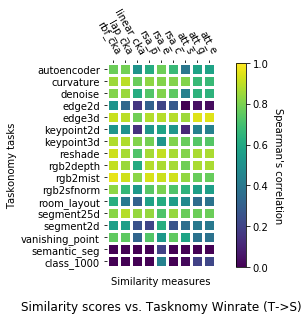

[0.67272203 0.62990196 0.47001153 0.59155133 0.66147636 0.59933679
 0.50346021 0.52133795 0.5233564 ]


In [53]:
#per row correlation
corr_value_row = {}
corr_value_row['rbf_cka'] = {}
corr_value_row['lap_cka'] = {}
corr_value_row['linear_cka'] = {}
corr_value_row['rsa_p'] = {}
corr_value_row['rsa_e'] = {}
corr_value_row['rsa_c'] = {}
corr_value_row['att_s'] = {}
corr_value_row['att_g'] = {}
corr_value_row['att_e'] = {}
corr_value_row_matrix = np.zeros((17,9))
#plt.rcParams.update({'font.size': 12})

for i,task in enumerate(task_list):
    temp,_ = spearmanr(matrix[i,:], affinity_rbf_cka[i,:])
    corr_value_row['rbf_cka'][task]=temp
    corr_value_row_matrix[i,0] = temp

    temp,_ = spearmanr(matrix[i,:], affinity_lap_cka[i,:])
    corr_value_row['lap_cka'][task]=temp
    corr_value_row_matrix[i,1] = temp
    
    temp,_ = spearmanr(matrix[i,:], affinity_linear_cka[i,:])
    corr_value_row['linear_cka'][task]=temp
    corr_value_row_matrix[i,2] = temp
    
    temp,_ = spearmanr(matrix[i,:], affinity_rsa_p[i,:])
    corr_value_row['rsa_p'][task]=temp
    corr_value_row_matrix[i,3] = temp 
    
    temp,_ = spearmanr(matrix[i,:], affinity_rsa_e[i,:])
    corr_value_row['rsa_e'][task]=temp
    corr_value_row_matrix[i,4] = temp
    
    temp,_ = spearmanr(matrix[i,:], affinity_rsa_m[i,:])
    corr_value_row['rsa_c'][task]=temp
    corr_value_row_matrix[i,5] = temp
    
    temp,_ = spearmanr(matrix[i,:], affinity_att_s[i,:])
    corr_value_row['att_s'][task]=temp
    corr_value_row_matrix[i,6] = temp    
    
    temp,_ = spearmanr(matrix[i,:], affinity_att_g[i,:])
    corr_value_row['att_g'][task]=temp
    corr_value_row_matrix[i,7] = temp    
    
    temp,_ = spearmanr(matrix[i,:], affinity_att_e[i,:])
    corr_value_row['att_e'][task]=temp
    corr_value_row_matrix[i,8] = temp
    
fig, ax = plt.subplots()
col_labels = ['rbf_cka','lap_cka','linear_cka','rsa_p','rsa_e','rsa_c','att_s','att_g','att_e']  
row_labels = task_list_refined
im, cbar = heatmap(corr_value_row_matrix, row_labels, col_labels, ax=ax,
            cbar_kw={}, cbarlabel="Spearman's correlation",vmin=0, vmax=1)


fig.tight_layout()
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.ylabel('Taskonomy tasks')
plt.xlabel('Similarity measures')
plt.title("Similarity scores vs. Tasknomy Winrate (T->S)", y=-0.24)

plt.show()

print(np.mean(corr_value_row_matrix,axis=0))




NameError: name 'x_labels' is not defined

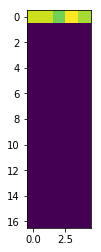

In [13]:
fig, ax = plt.subplots()
ax.imshow(corr_value_row_matrix)
num_x_labels = 5 # how many labels to see on axis x
step_x = int(5 / (num_x_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,5,step_x) # pixel count at label position
 # labels you want to see
plt.xticks(x_positions, x_labels)
plt.xticks(rotation=80)

num_y_labels = 17 # how many labels to see on axis x
step_y = int(17 / (num_y_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,17,step_y) # pixel count at label position
y_labels = task_list # labels you want to see
plt.yticks(y_positions, y_labels)
plt.colorbar()
print(np.mean(corr_value_row_matrix,axis=0))

for (j,i),label in np.ndenumerate(corr_value_row_matrix):
    ax.text(i,j,label,ha='center',va='center')

TypeError: unsupported operand type(s) for +: 'int' and 'dict'

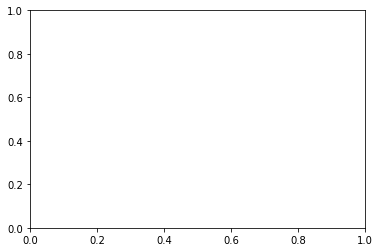

In [9]:
import matplotlib.pyplot as plt

D=corr_value_row
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x
plt.xticks(rotation=70)
plt.ylabel('Pearsons Correlation')
plt.xlabel('Similiarity measures')
plt.title("Correlation with Taskonomy matrix")
plt.show()

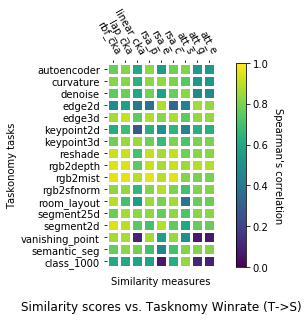

[0.67272203 0.62990196 0.47001153 0.59155133 0.66147636 0.59933679
 0.50346021 0.52133795 0.5233564 ]
[0.80017301 0.81502307 0.63249712 0.78056517 0.70141292 0.77825836
 0.69031142 0.66868512 0.66681084]


In [52]:
#per column correlation 
#per row correlation
corr_value_col = {}
corr_value_col['rbf_cka'] = {}
corr_value_col['lap_cka'] = {}
corr_value_col['linear_cka'] = {}
corr_value_col['rsa_p'] = {}
corr_value_col['rsa_e'] = {}
corr_value_col['rsa_c'] = {}
corr_value_col['att_s'] = {}
corr_value_col['att_g'] = {}
corr_value_col['att_e'] = {}
corr_value_col_matrix = np.zeros((17,9))
for j,task in enumerate(task_list):
    temp,_ = spearmanr(matrix[:,j], affinity_rbf_cka[:,j])
    corr_value_col['rbf_cka'][task]=temp
    corr_value_col_matrix[j,0] = temp

    temp,_ = spearmanr(matrix[:,j], affinity_lap_cka[:,j])
    corr_value_col['lap_cka'][task]=temp
    corr_value_col_matrix[j,1] = temp    
    
    temp,_ = spearmanr(matrix[:,j], affinity_linear_cka[:,j])
    corr_value_col['linear_cka'][task]=temp
    corr_value_col_matrix[j,2] = temp
    
    temp,_ = spearmanr(matrix[:,j], affinity_rsa_p[:,j])
    corr_value_col['rsa_p'][task]=temp
    corr_value_col_matrix[j,3] = temp   
    
    temp,_ = spearmanr(matrix[:,j], affinity_rsa_e[:,j])
    corr_value_col['rsa_e'][task]=temp
    corr_value_col_matrix[j,4] = temp
    
    temp,_ = spearmanr(matrix[:,j], affinity_rsa_m[:,j])
    corr_value_col['rsa_c'][task]=temp
    corr_value_col_matrix[j,5] = temp
    

    
    temp,_ = spearmanr(matrix[:,j], affinity_att_s[:,j])
    corr_value_col['att_s'][task]=temp
    corr_value_col_matrix[j,6] = temp    
    temp,_ = spearmanr(matrix[:,j], affinity_att_g[:,j])
    corr_value_col['att_g'][task]=temp
    corr_value_col_matrix[j,7] = temp    
    temp,_ = spearmanr(matrix[:,j], affinity_att_e[:,j])
    corr_value_col['att_e'][task]=temp
    corr_value_col_matrix[j,8] = temp
    
fig, ax = plt.subplots()
col_labels = ['rbf_cka','lap_cka','linear_cka','rsa_p','rsa_e','rsa_c','att_s','att_g','att_e']    
row_labels = task_list_refined
im, cbar = heatmap(corr_value_col_matrix, row_labels, col_labels, ax=ax,
            cbar_kw={}, cbarlabel="Spearman's correlation",vmin=0, vmax=1)

fig.tight_layout()
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.ylabel('Taskonomy tasks')
plt.xlabel('Similarity measures')
plt.title("Similarity scores vs. Tasknomy Winrate (T->S)", y=-0.24)

plt.show()
print(np.mean(corr_value_row_matrix,axis=0))


print(np.mean(corr_value_col_matrix,axis=0))

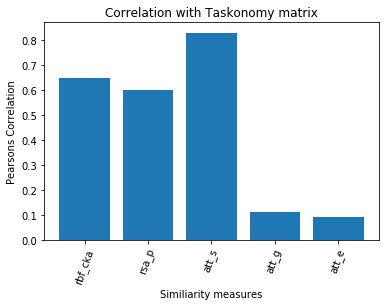

In [14]:
import matplotlib.pyplot as plt

D=corr_value_col
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x
plt.xticks(rotation=70)
plt.ylabel('Pearsons Correlation')
plt.xlabel('Similiarity measures')
plt.title("Correlation with Taskonomy matrix")
plt.show()